#Regresión


In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


from scipy import stats


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression


from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

#0. Análisis Exploratorio Inicial

In [2]:

uploaded = files.upload()


data_1 = pd.read_excel(next(iter(uploaded)))
display(data_1)

Saving income_dataset.xlsx to income_dataset.xlsx


,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [3]:
print("COLUMNAS ANTES:\n")
for col in data_1.columns:
    print(col)

data_1 = data_1.rename(columns={
    "Age": "edad",
    "Education_Level": "nivel_educativo",
    "Occupation": "ocupacion",
    "Number_of_Dependents": "n_dependientes",
    "Location": "zona_residencia",
    "Work_Experience": "exp_laboral",
    "Marital_Status": "estado_civil",
    "Employment_Status": "situacion_laboral",
    "Household_Size": "tam_hogar",
    "Homeownership_Status": "tenencia_vivienda",
    "Type_of_Housing": "tipo_vivienda",
    "Gender": "genero",
    "Primary_Mode_of_Transportation": "transporte_principal",
    "Income": "ingreso"
})

print("\nCOLUMNAS DESPUÉS:\n")
for col in data_1.columns:
    print(col)



COLUMNAS ANTES:

Age
Education_Level
Occupation
Number_of_Dependents
Location
Work_Experience
Marital_Status
Employment_Status
Household_Size
Homeownership_Status
Type_of_Housing
Gender
Primary_Mode_of_Transportation
Income

COLUMNAS DESPUÉS:

edad
nivel_educativo
ocupacion
n_dependientes
zona_residencia
exp_laboral
estado_civil
situacion_laboral
tam_hogar
tenencia_vivienda
tipo_vivienda
genero
transporte_principal
ingreso


In [4]:
for col, dtype in data_1.dtypes.items():
    print(f"{col}: {dtype}")

edad: int64
nivel_educativo: object
ocupacion: object
n_dependientes: int64
zona_residencia: object
exp_laboral: int64
estado_civil: object
situacion_laboral: object
tam_hogar: int64
tenencia_vivienda: object
tipo_vivienda: object
genero: object
transporte_principal: object
ingreso: int64


In [5]:

cols_num = ["edad", "n_dependientes", "exp_laboral", "tam_hogar", "ingreso"]
for c in cols_num:
    data_1[c] = pd.to_numeric(data_1[c], errors="coerce")


cols_cat = [
    "nivel_educativo", "ocupacion", "zona_residencia",
    "estado_civil", "situacion_laboral", "tenencia_vivienda",
    "tipo_vivienda", "genero", "transporte_principal"
]
for c in cols_cat:
    data_1[c] = data_1[c].astype("category")


data_1.dtypes

,0
edad,int64
nivel_educativo,category
ocupacion,category
n_dependientes,int64
zona_residencia,category
exp_laboral,int64
estado_civil,category
situacion_laboral,category
tam_hogar,int64
tenencia_vivienda,category


# 1. Análisis Estadístico Inicial (Descriptivo)

## 1.1 Separar variables numéricas y Separar variables categóricas

In [6]:

num_cols = data_1.select_dtypes(include="number").columns
cat_cols = data_1.select_dtypes(include=["category", "object", "bool"]).columns

print("Numéricas:")
print(list(num_cols))

print("\nCategóricas:")
print(list(cat_cols))

Numéricas:
['edad', 'n_dependientes', 'exp_laboral', 'tam_hogar', 'ingreso']

Categóricas:
['nivel_educativo', 'ocupacion', 'zona_residencia', 'estado_civil', 'situacion_laboral', 'tenencia_vivienda', 'tipo_vivienda', 'genero', 'transporte_principal']


##1.2 Análisis Descriptivo Numérico




,count,mean,std,min,25%,50%,75%,max
edad,10000.0,44.0217,1.520400e+01,18.0,31.0,44.0,57.0,70.0
n_dependientes,10000.0,2.5270,1.713991e+00,0.0,1.0,3.0,4.0,5.0
exp_laboral,10000.0,24.8588,1.465262e+01,0.0,12.0,25.0,37.0,50.0
tam_hogar,10000.0,3.9896,2.010496e+00,1.0,2.0,4.0,6.0,7.0
ingreso,10000.0,816838.1667,1.821089e+06,31044.0,68446.0,72943.0,350667.5,9992571.0


,pct_missing
edad,0.0
n_dependientes,0.0
exp_laboral,0.0
tam_hogar,0.0
ingreso,0.0



Top-5 valores más frecuentes: edad


,valor,conteo,porcentaje,rank
0,43,223,2.23,1
1,66,216,2.16,2
2,62,215,2.15,3
3,40,212,2.12,4
4,64,209,2.09,5



Top-5 valores más frecuentes: n_dependientes


,valor,conteo,porcentaje,rank
0,5,1745,17.45,1
1,3,1712,17.12,2
2,1,1651,16.51,3
3,0,1642,16.42,4
4,4,1629,16.29,5



Top-5 valores más frecuentes: exp_laboral


,valor,conteo,porcentaje,rank
0,2,224,2.24,1
1,44,221,2.21,2
2,48,219,2.19,3
3,24,218,2.18,4
4,33,216,2.16,5



Top-5 valores más frecuentes: tam_hogar


,valor,conteo,porcentaje,rank
0,1,1477,14.77,1
1,3,1445,14.45,2
2,6,1437,14.37,3
3,7,1433,14.33,4
4,5,1411,14.11,5



Top-5 valores más frecuentes: ingreso


,valor,conteo,porcentaje,rank
0,74306,10,0.10,1
1,71180,7,0.07,2
2,72296,6,0.06,3
3,68116,6,0.06,4
4,74294,6,0.06,5


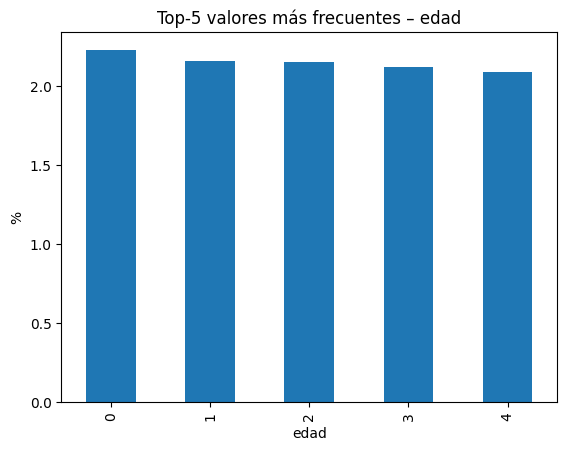

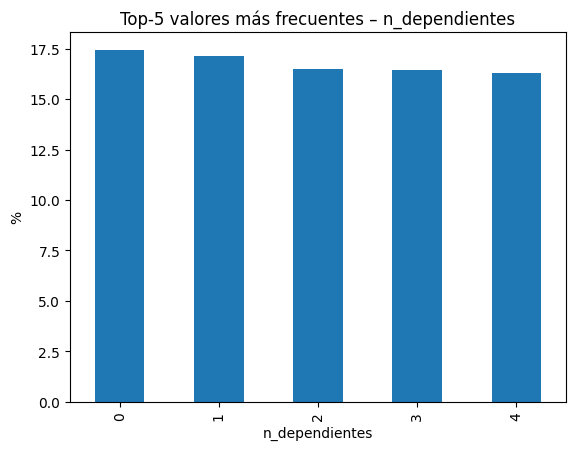

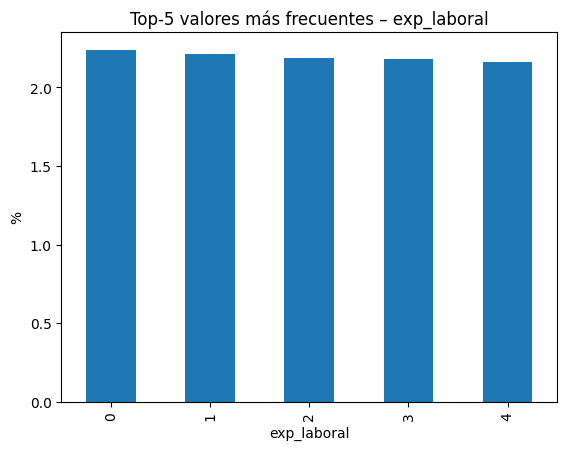

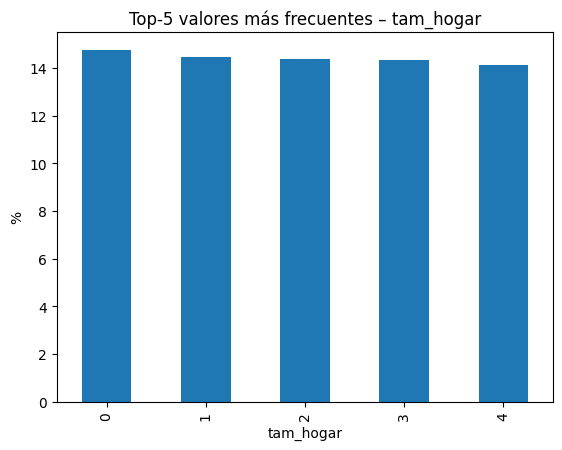

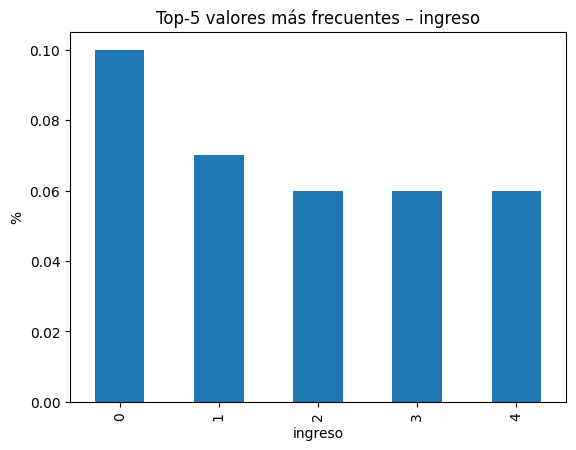

In [7]:


desc_stats = data_1[num_cols].describe().T
display(desc_stats)



missing_pct = (
    data_1[num_cols]
    .isna()
    .mean()
    .mul(100)
    .to_frame("pct_missing")
)

display(missing_pct)


top5_tables = {}

for col in num_cols:
    vc = data_1[col].value_counts().head(5)
    vp = data_1[col].value_counts(normalize=True).head(5)

    top5 = pd.DataFrame({
        "valor": vc.index,
        "conteo": vc.values,
        "porcentaje": (vp.values * 100).round(2),
        "rank": range(1, len(vc) + 1)
    })

    top5_tables[col] = top5

    print(f"\nTop-5 valores más frecuentes: {col}")
    display(top5)



for col, top5 in top5_tables.items():
    plt.figure()
    top5["porcentaje"].plot(kind="bar")
    plt.title(f"Top-5 valores más frecuentes – {col}")
    plt.ylabel("%")
    plt.xlabel(col)
    plt.show()

##1.3 Análisis Descriptivo de Variables Categóricas


Cardinalidad – nivel_educativo
n_unique = 4


,categoria,conteo,porcentaje
0,Bachelor's,4058,40.58
1,High School,2959,29.59
2,Master's,2482,24.82
3,Doctorate,501,5.01



Cardinalidad – ocupacion
n_unique = 5


,categoria,conteo,porcentaje
0,Healthcare,3035,30.35
1,Technology,2407,24.07
2,Finance,1525,15.25
3,Others,1521,15.21
4,Education,1512,15.12



Cardinalidad – zona_residencia
n_unique = 3


,categoria,conteo,porcentaje
0,Urban,7037,70.37
1,Suburban,1951,19.51
2,Rural,1012,10.12



Cardinalidad – estado_civil
n_unique = 3


,categoria,conteo,porcentaje
0,Married,5136,51.36
1,Single,3900,39.00
2,Divorced,964,9.64



Cardinalidad – situacion_laboral
n_unique = 3


,categoria,conteo,porcentaje
0,Full-time,5004,50.04
1,Part-time,3016,30.16
2,Self-employed,1980,19.80



Cardinalidad – tenencia_vivienda
n_unique = 2


,categoria,conteo,porcentaje
0,Own,6018,60.18
1,Rent,3982,39.82



Cardinalidad – tipo_vivienda
n_unique = 3


,categoria,conteo,porcentaje
0,Single-family home,4055,40.55
1,Apartment,4001,40.01
2,Townhouse,1944,19.44



Cardinalidad – genero
n_unique = 2


,categoria,conteo,porcentaje
0,Male,5123,51.23
1,Female,4877,48.77



Cardinalidad – transporte_principal
n_unique = 4


,categoria,conteo,porcentaje
0,Public transit,4047,40.47
1,Car,2986,29.86
2,Biking,1940,19.40
3,Walking,1027,10.27



Top-10 valores más frecuentes – nivel_educativo


,categoria,conteo,porcentaje,rank
0,Bachelor's,4058,40.58,1
1,High School,2959,29.59,2
2,Master's,2482,24.82,3
3,Doctorate,501,5.01,4



Top-10 valores más frecuentes – ocupacion


,categoria,conteo,porcentaje,rank
0,Healthcare,3035,30.35,1
1,Technology,2407,24.07,2
2,Finance,1525,15.25,3
3,Others,1521,15.21,4
4,Education,1512,15.12,5



Top-10 valores más frecuentes – zona_residencia


,categoria,conteo,porcentaje,rank
0,Urban,7037,70.37,1
1,Suburban,1951,19.51,2
2,Rural,1012,10.12,3



Top-10 valores más frecuentes – estado_civil


,categoria,conteo,porcentaje,rank
0,Married,5136,51.36,1
1,Single,3900,39.00,2
2,Divorced,964,9.64,3



Top-10 valores más frecuentes – situacion_laboral


,categoria,conteo,porcentaje,rank
0,Full-time,5004,50.04,1
1,Part-time,3016,30.16,2
2,Self-employed,1980,19.80,3



Top-10 valores más frecuentes – tenencia_vivienda


,categoria,conteo,porcentaje,rank
0,Own,6018,60.18,1
1,Rent,3982,39.82,2



Top-10 valores más frecuentes – tipo_vivienda


,categoria,conteo,porcentaje,rank
0,Single-family home,4055,40.55,1
1,Apartment,4001,40.01,2
2,Townhouse,1944,19.44,3



Top-10 valores más frecuentes – genero


,categoria,conteo,porcentaje,rank
0,Male,5123,51.23,1
1,Female,4877,48.77,2



Top-10 valores más frecuentes – transporte_principal


,categoria,conteo,porcentaje,rank
0,Public transit,4047,40.47,1
1,Car,2986,29.86,2
2,Biking,1940,19.40,3
3,Walking,1027,10.27,4


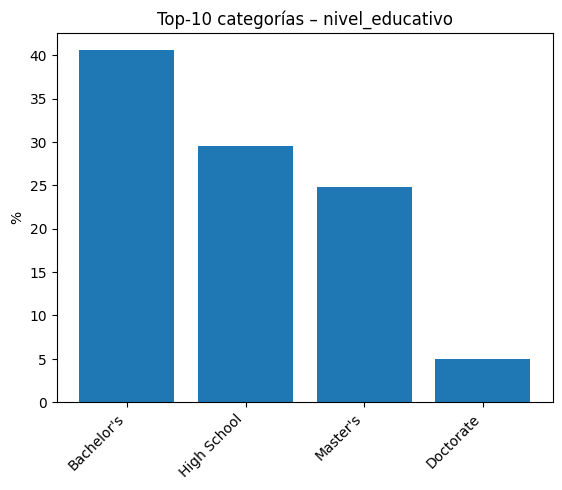

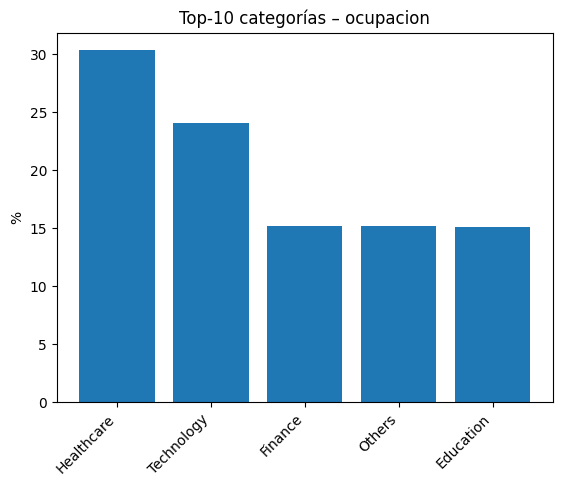

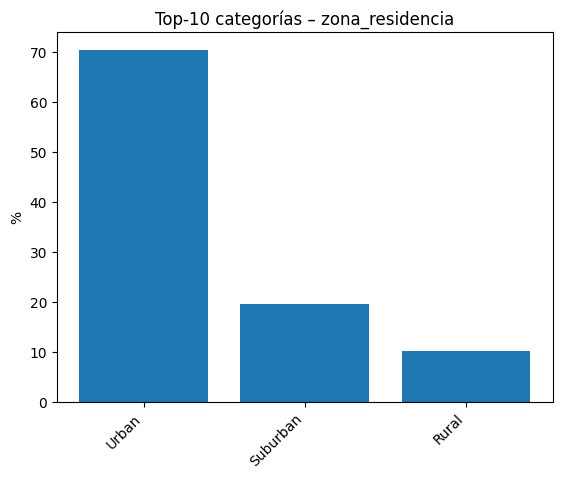

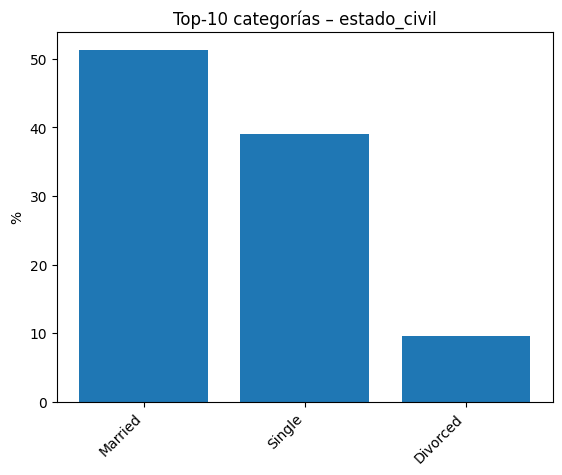

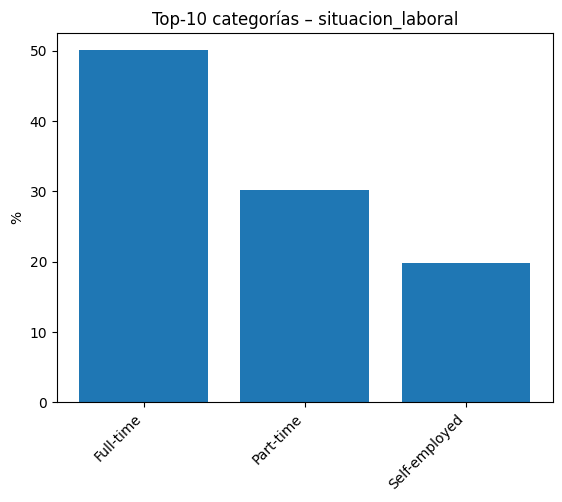

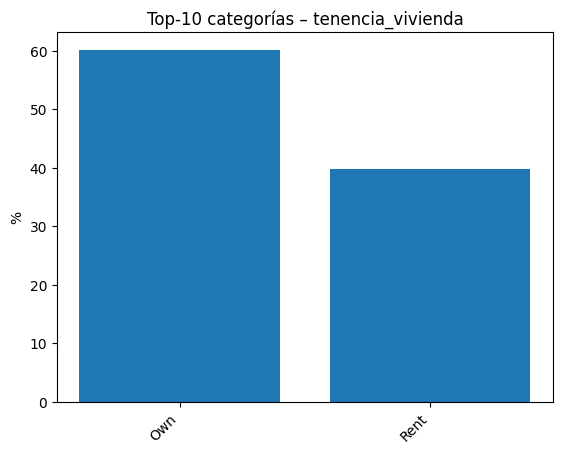

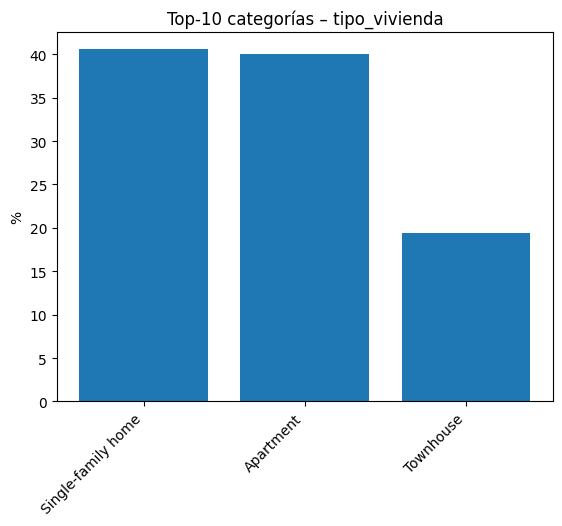

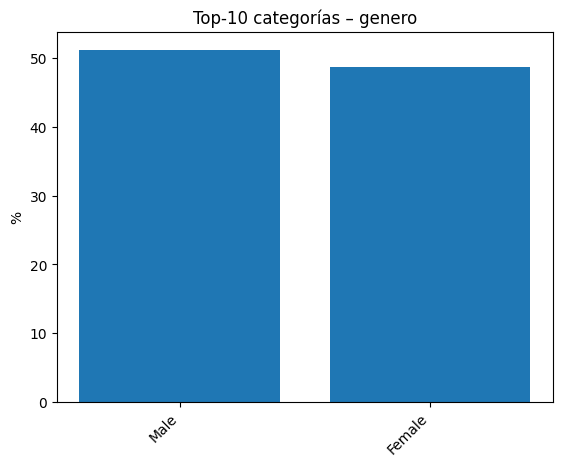

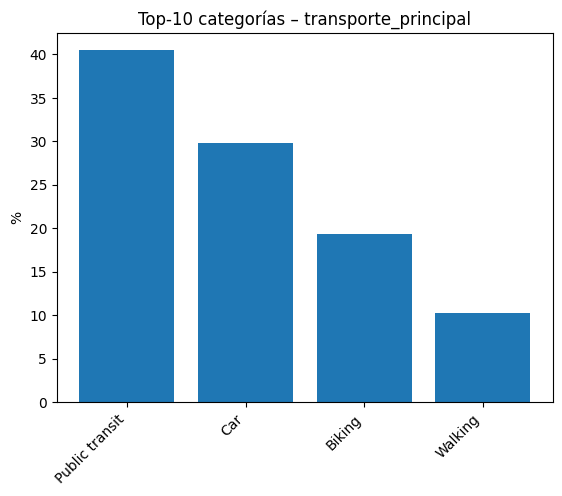

In [8]:


cardinality_tables = {}
n_total = len(data_1)

for col in cat_cols:
    vc = data_1[col].value_counts(dropna=False)
    pct = (vc / n_total * 100).round(2)

    card = pd.DataFrame({
        "categoria": vc.index.astype(str),
        "conteo": vc.values,
        "porcentaje": pct.values
    })

    cardinality_tables[col] = {
        "n_unique": data_1[col].nunique(dropna=False),
        "tabla": card
    }

    print(f"\nCardinalidad – {col}")
    print(f"n_unique = {data_1[col].nunique(dropna=False)}")
    display(card)




top10_cat_tables = {}

for col in cat_cols:
    vc = data_1[col].value_counts(dropna=False).head(10)
    vp = data_1[col].value_counts(normalize=True, dropna=False).head(10)

    top10 = pd.DataFrame({
        "categoria": vc.index.astype(str),
        "conteo": vc.values,
        "porcentaje": (vp.values * 100).round(2),
        "rank": range(1, len(vc) + 1)
    })

    top10_cat_tables[col] = top10

    print(f"\nTop-10 valores más frecuentes – {col}")
    display(top10)




for col, df in top10_cat_tables.items():
    plt.figure()
    plt.bar(df["categoria"], df["porcentaje"])
    plt.title(f"Top-10 categorías – {col}")
    plt.ylabel("%")
    plt.xticks(rotation=45, ha="right")
    plt.show()



#2. Análisis de Calidad de los Datos (Diagnóstico)


##2.1 Calidad de Variables Numéricas

In [9]:


audit_dtypes = pd.DataFrame({
    "dtype_original": data_1[num_cols].dtypes
})

data_1[num_cols] = data_1[num_cols].apply(pd.to_numeric, errors="coerce")

audit_dtypes["dtype_post_coerce"] = data_1[num_cols].dtypes
display(audit_dtypes)




missing_audit = (
    pd.DataFrame({
        "n_missing": data_1[num_cols].isna().sum(),
        "pct_missing": data_1[num_cols].isna().mean().mul(100).round(2)
    })
    .sort_values("pct_missing", ascending=False)
)

display(missing_audit)




quantiles = (
    data_1[num_cols]
    .quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99])
    .T
)

extremos = (
    data_1[num_cols]
    .agg(["min", "max"])
    .T
)

outlier_audit = quantiles.join(extremos)
display(outlier_audit)




outlier_flags = {}

for col in num_cols:
    q1, q3 = data_1[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    outlier_flags[col] = {
        "n_outliers": ((data_1[col] < lower) | (data_1[col] > upper)).sum(),
        "pct_outliers": (
            ((data_1[col] < lower) | (data_1[col] > upper)).mean() * 100
        ).round(2)
    }

outlier_summary = pd.DataFrame(outlier_flags).T
display(outlier_summary)




p_low, p_high = data_1["ingreso"].quantile([0.01, 0.99])

data_1["ingreso"] = data_1["ingreso"].clip(
    lower=p_low,
    upper=p_high
)

data_1["ingreso"].describe(percentiles=[0.01, 0.5, 0.99])



n_dup = data_1.duplicated().sum()
pct_dup = round(n_dup / len(data_1) * 100, 2)

pd.DataFrame({
    "n_duplicados": [n_dup],
    "pct_duplicados": [pct_dup]
})


,dtype_original,dtype_post_coerce
edad,int64,int64
n_dependientes,int64,int64
exp_laboral,int64,int64
tam_hogar,int64,int64
ingreso,int64,int64


,n_missing,pct_missing
edad,0,0.0
n_dependientes,0,0.0
exp_laboral,0,0.0
tam_hogar,0,0.0
ingreso,0,0.0


,0.01,0.05,0.25,0.5,0.75,0.95,0.99,min,max
edad,18.00,20.0,31.0,44.0,57.0,68.00,70.00,18,70
n_dependientes,0.00,0.0,1.0,3.0,4.0,5.00,5.00,0,5
exp_laboral,0.00,2.0,12.0,25.0,37.0,48.00,50.00,0,50
tam_hogar,1.00,1.0,2.0,4.0,6.0,7.00,7.00,1,7
ingreso,36121.95,64149.7,68446.0,72943.0,350667.5,5343905.45,8836918.82,31044,9992571


,n_outliers,pct_outliers
edad,0.0,0.00
n_dependientes,0.0,0.00
exp_laboral,0.0,0.00
tam_hogar,0.0,0.00
ingreso,1931.0,19.31


,n_duplicados,pct_duplicados
0,0,0.0


##2.2 Calidad de Variables Categóricas

In [10]:


missing_cat = (
    pd.DataFrame({
        "n_missing": data_1[cat_cols].isna().sum(),
        "pct_missing": data_1[cat_cols].isna().mean().mul(100).round(2)
    })
    .sort_values("pct_missing", ascending=False)
)

print("\n=== Missing real (NaN) ===")
display(missing_cat)



missing_tokens = ["", " ", "?", "NA", "N/A", "None", "none"]

fake_missing_tables = {}

for col in cat_cols:
    s = data_1[col].astype(str).str.strip()
    fake_missing_tables[col] = s.isin(missing_tokens).sum()

fake_missing = pd.DataFrame.from_dict(
    fake_missing_tables, orient="index", columns=["n_fake_missing"]
)
fake_missing["pct_fake_missing"] = (
    fake_missing["n_fake_missing"] / len(data_1) * 100
).round(2)

print("\n=== Missing codificado (falso missing) ===")
display(fake_missing.sort_values("pct_fake_missing", ascending=False))




cardinality = pd.DataFrame({
    "n_unique": data_1[cat_cols].nunique(dropna=False),
    "top_freq_pct": [
        data_1[c].value_counts(normalize=True, dropna=False).iloc[0] * 100
        for c in cat_cols
    ]
}).round(2)

print("\n=== Cardinalidad y dominancia ===")
display(cardinality.sort_values("n_unique", ascending=False))



threshold = 0.01  # 1%
low_freq_tables = {}

print("\n=== Categorías raras (<1%) ===")
for col in cat_cols:
    vc = data_1[col].value_counts(normalize=True, dropna=False)
    low_freq = vc[vc < threshold]

    if not low_freq.empty:
        low_freq_tables[col] = low_freq.mul(100).round(2).to_frame("pct")
        print(f"\n{col}")
        display(low_freq_tables[col])


unique_values_tables = {}

print("\n=== Valores únicos por variable ===")
for col in cat_cols:
    uv = data_1[col].value_counts(dropna=False)
    unique_values_tables[col] = uv
    print(f"\n{col}")
    display(uv)



categorical_audit = (
    pd.DataFrame({
        "missing_pct": missing_cat["pct_missing"],
        "fake_missing_pct": fake_missing["pct_fake_missing"],
        "n_unique": cardinality["n_unique"],
        "top_freq_pct": cardinality["top_freq_pct"]
    })
    .fillna(0)
    .sort_values("n_unique", ascending=False)
)

print("\n=== Diagnóstico categórico final ===")
display(categorical_audit)



=== Missing real (NaN) ===


,n_missing,pct_missing
nivel_educativo,0,0.0
ocupacion,0,0.0
zona_residencia,0,0.0
estado_civil,0,0.0
situacion_laboral,0,0.0
tenencia_vivienda,0,0.0
tipo_vivienda,0,0.0
genero,0,0.0
transporte_principal,0,0.0



=== Missing codificado (falso missing) ===


,n_fake_missing,pct_fake_missing
nivel_educativo,0,0.0
ocupacion,0,0.0
zona_residencia,0,0.0
estado_civil,0,0.0
situacion_laboral,0,0.0
tenencia_vivienda,0,0.0
tipo_vivienda,0,0.0
genero,0,0.0
transporte_principal,0,0.0



=== Cardinalidad y dominancia ===


,n_unique,top_freq_pct
ocupacion,5,30.35
nivel_educativo,4,40.58
transporte_principal,4,40.47
estado_civil,3,51.36
zona_residencia,3,70.37
situacion_laboral,3,50.04
tipo_vivienda,3,40.55
tenencia_vivienda,2,60.18
genero,2,51.23



=== Categorías raras (<1%) ===

=== Valores únicos por variable ===

nivel_educativo


,count
nivel_educativo,
Bachelor's,4058
High School,2959
Master's,2482
Doctorate,501



ocupacion


,count
ocupacion,
Healthcare,3035
Technology,2407
Finance,1525
Others,1521
Education,1512



zona_residencia


,count
zona_residencia,
Urban,7037
Suburban,1951
Rural,1012



estado_civil


,count
estado_civil,
Married,5136
Single,3900
Divorced,964



situacion_laboral


,count
situacion_laboral,
Full-time,5004
Part-time,3016
Self-employed,1980



tenencia_vivienda


,count
tenencia_vivienda,
Own,6018
Rent,3982



tipo_vivienda


,count
tipo_vivienda,
Single-family home,4055
Apartment,4001
Townhouse,1944



genero


,count
genero,
Male,5123
Female,4877



transporte_principal


,count
transporte_principal,
Public transit,4047
Car,2986
Biking,1940
Walking,1027



=== Diagnóstico categórico final ===


,missing_pct,fake_missing_pct,n_unique,top_freq_pct
ocupacion,0.0,0.0,5,30.35
nivel_educativo,0.0,0.0,4,40.58
transporte_principal,0.0,0.0,4,40.47
estado_civil,0.0,0.0,3,51.36
zona_residencia,0.0,0.0,3,70.37
situacion_laboral,0.0,0.0,3,50.04
tipo_vivienda,0.0,0.0,3,40.55
tenencia_vivienda,0.0,0.0,2,60.18
genero,0.0,0.0,2,51.23


#3. Preprocesamiento de Datos

##3.1 Variables Numéricas

In [11]:
missing_before = (
    data_1[num_cols]
    .isna()
    .mean()
    .mul(100)
    .round(2)
    .to_frame("pct_missing_before")
)

print("\n=== Missing antes de imputación ===")
display(missing_before)


imputer = SimpleImputer(strategy="median")
data_1[num_cols] = imputer.fit_transform(data_1[num_cols])


missing_after = (
    data_1[num_cols]
    .isna()
    .mean()
    .mul(100)
    .round(2)
    .to_frame("pct_missing_after")
)

print("\n=== Missing después de imputación ===")
display(missing_after)


impact_imputation = pd.DataFrame({
    "mean": data_1[num_cols].mean(),
    "median": data_1[num_cols].median()
}).round(2)

print("\n=== Impacto de imputación (mean vs median) ===")
display(impact_imputation)


if "ingreso" in num_cols and (data_1["ingreso"] > 0).all():
    data_1["ingreso_log"] = np.log1p(data_1["ingreso"])
    num_cols = num_cols.append(pd.Index(["ingreso_log"]))

print("\n=== Variables transformadas con log ===")
print(["ingreso"])


skew_check = pd.DataFrame({
    "skew_original": [data_1["ingreso"].skew()],
    "skew_log": [data_1["ingreso_log"].skew()]
}, index=["ingreso"]).round(3)

print("\n=== Reducción de sesgo tras log ===")
display(skew_check)


print("\n=== Tipos finales de variables numéricas ===")
display(data_1[num_cols].dtypes)




=== Missing antes de imputación ===


,pct_missing_before
edad,0.0
n_dependientes,0.0
exp_laboral,0.0
tam_hogar,0.0
ingreso,0.0



=== Missing después de imputación ===


,pct_missing_after
edad,0.0
n_dependientes,0.0
exp_laboral,0.0
tam_hogar,0.0
ingreso,0.0



=== Impacto de imputación (mean vs median) ===


,mean,median
edad,44.02,44.0
n_dependientes,2.53,3.0
exp_laboral,24.86,25.0
tam_hogar,3.99,4.0
ingreso,811336.62,72943.0



=== Variables transformadas con log ===
['ingreso']

=== Reducción de sesgo tras log ===


,skew_original,skew_log
ingreso,2.92,1.345



=== Tipos finales de variables numéricas ===


,0
edad,float64
n_dependientes,float64
exp_laboral,float64
tam_hogar,float64
ingreso,float64
ingreso_log,float64


##3.2 Variables Categóricas

In [12]:

for col in cat_cols:
    data_1[col] = data_1[col].astype("string").str.strip()

print("\n=== Cardinalidad tras strip ===")
display(data_1[cat_cols].nunique(dropna=False).to_frame("n_unique"))


missing_real = (
    data_1[cat_cols]
    .isna()
    .mean()
    .mul(100)
    .round(2)
    .to_frame("pct_missing_real")
    .sort_values("pct_missing_real", ascending=False)
)

print("\n=== Missing real (NaN) ===")
display(missing_real)


missing_tokens = ["", "?", "NA", "N/A", "None", "none"]

fake_missing = pd.DataFrame({
    "n_fake_missing": [
        data_1[c].isin(missing_tokens).sum() for c in cat_cols
    ]
}, index=cat_cols)

fake_missing["pct_fake_missing"] = (
    fake_missing["n_fake_missing"] / len(data_1) * 100
).round(2)

print("\n=== Missing codificado ===")
display(fake_missing.sort_values("pct_fake_missing", ascending=False))



for col in cat_cols:
    data_1[col] = data_1[col].replace(missing_tokens, np.nan)



imputer_cat = SimpleImputer(strategy="constant", fill_value="Missing")
data_1[cat_cols] = imputer_cat.fit_transform(data_1[cat_cols])

print("\n=== Missing categórico después de imputación ===")
display(
    data_1[cat_cols]
    .isna()
    .mean()
    .mul(100)
    .round(2)
    .to_frame("pct_missing_after")
)



dominance = pd.DataFrame({
    "n_unique": data_1[cat_cols].nunique(),
    "top_freq_pct": [
        data_1[c].value_counts(normalize=True).iloc[0] * 100
        for c in cat_cols
    ]
}).round(2)

print("\n=== Cardinalidad y dominancia ===")
display(dominance.sort_values("n_unique", ascending=False))



print("\n=== Categorías raras (<1%) ===")
for col in cat_cols:
    rare = data_1[col].value_counts(normalize=True)
    rare = rare[rare < 0.01]

    if not rare.empty:
        print(f"\n{col}")
        display(rare.mul(100).round(2).to_frame("pct"))



print("\n=== Valores únicos por variable ===")
for col in cat_cols:
    print(f"\n{col}")
    display(data_1[col].value_counts())


categorical_audit = pd.DataFrame({
    "missing_real_pct": missing_real["pct_missing_real"],
    "fake_missing_pct": fake_missing["pct_fake_missing"],
    "n_unique": dominance["n_unique"],
    "top_freq_pct": dominance["top_freq_pct"]
}).fillna(0).sort_values("n_unique", ascending=False)

print("\n=== Auditoría categórica final ===")
display(categorical_audit)



=== Cardinalidad tras strip ===


,n_unique
nivel_educativo,4
ocupacion,5
zona_residencia,3
estado_civil,3
situacion_laboral,3
tenencia_vivienda,2
tipo_vivienda,3
genero,2
transporte_principal,4



=== Missing real (NaN) ===


,pct_missing_real
nivel_educativo,0.0
ocupacion,0.0
zona_residencia,0.0
estado_civil,0.0
situacion_laboral,0.0
tenencia_vivienda,0.0
tipo_vivienda,0.0
genero,0.0
transporte_principal,0.0



=== Missing codificado ===


,n_fake_missing,pct_fake_missing
nivel_educativo,0,0.0
ocupacion,0,0.0
zona_residencia,0,0.0
estado_civil,0,0.0
situacion_laboral,0,0.0
tenencia_vivienda,0,0.0
tipo_vivienda,0,0.0
genero,0,0.0
transporte_principal,0,0.0



=== Missing categórico después de imputación ===


,pct_missing_after
nivel_educativo,0.0
ocupacion,0.0
zona_residencia,0.0
estado_civil,0.0
situacion_laboral,0.0
tenencia_vivienda,0.0
tipo_vivienda,0.0
genero,0.0
transporte_principal,0.0



=== Cardinalidad y dominancia ===


,n_unique,top_freq_pct
ocupacion,5,30.35
nivel_educativo,4,40.58
transporte_principal,4,40.47
estado_civil,3,51.36
zona_residencia,3,70.37
situacion_laboral,3,50.04
tipo_vivienda,3,40.55
tenencia_vivienda,2,60.18
genero,2,51.23



=== Categorías raras (<1%) ===

=== Valores únicos por variable ===

nivel_educativo


,count
nivel_educativo,
Bachelor's,4058
High School,2959
Master's,2482
Doctorate,501



ocupacion


,count
ocupacion,
Healthcare,3035
Technology,2407
Finance,1525
Others,1521
Education,1512



zona_residencia


,count
zona_residencia,
Urban,7037
Suburban,1951
Rural,1012



estado_civil


,count
estado_civil,
Married,5136
Single,3900
Divorced,964



situacion_laboral


,count
situacion_laboral,
Full-time,5004
Part-time,3016
Self-employed,1980



tenencia_vivienda


,count
tenencia_vivienda,
Own,6018
Rent,3982



tipo_vivienda


,count
tipo_vivienda,
Single-family home,4055
Apartment,4001
Townhouse,1944



genero


,count
genero,
Male,5123
Female,4877



transporte_principal


,count
transporte_principal,
Public transit,4047
Car,2986
Biking,1940
Walking,1027



=== Auditoría categórica final ===


,missing_real_pct,fake_missing_pct,n_unique,top_freq_pct
ocupacion,0.0,0.0,5,30.35
nivel_educativo,0.0,0.0,4,40.58
transporte_principal,0.0,0.0,4,40.47
estado_civil,0.0,0.0,3,51.36
zona_residencia,0.0,0.0,3,70.37
situacion_laboral,0.0,0.0,3,50.04
tipo_vivienda,0.0,0.0,3,40.55
tenencia_vivienda,0.0,0.0,2,60.18
genero,0.0,0.0,2,51.23


#4. Análisis Exploratorio de Datos (EDA Univariado) y Visualización

##4.1 Variables Numéricas: Estadística Descriptiva y Visualización


=== Estadísticos descriptivos ===


,edad,n_dependientes,exp_laboral,tam_hogar,ingreso,ingreso_log
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00,10000.000000
mean,44.021700,2.527000,24.858800,3.989600,811336.62,12.060382
std,15.203998,1.713991,14.652622,2.010496,1795407.17,1.519620
min,18.000000,0.000000,0.000000,1.000000,36121.95,10.494684
25%,31.000000,1.000000,12.000000,2.000000,68446.00,11.133815
50%,44.000000,3.000000,25.000000,4.000000,72943.00,11.197447
75%,57.000000,4.000000,37.000000,6.000000,350667.50,12.767597
max,70.000000,5.000000,50.000000,7.000000,8836918.82,15.994449



=== Cuantiles (colas y outliers) ===


,0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99
edad,18.000000,20.00000,23.000000,31.000000,44.000000,57.000000,6.500000e+01,6.800000e+01,7.000000e+01
n_dependientes,0.000000,0.00000,0.000000,1.000000,3.000000,4.000000,5.000000e+00,5.000000e+00,5.000000e+00
exp_laboral,0.000000,2.00000,4.000000,12.000000,25.000000,37.000000,4.500000e+01,4.800000e+01,5.000000e+01
tam_hogar,1.000000,1.00000,1.000000,2.000000,4.000000,6.000000,7.000000e+00,7.000000e+00,7.000000e+00
ingreso,36121.999500,64149.70000,65766.000000,68446.000000,72943.000000,350667.500000,2.890510e+06,5.343905e+06,8.836794e+06
ingreso_log,10.494685,11.06899,11.093873,11.133815,11.197447,12.767597,1.487694e+01,1.549147e+01,1.599443e+01



=== % Missing por variable ===


,0
edad,0.0
n_dependientes,0.0
exp_laboral,0.0
tam_hogar,0.0
ingreso,0.0
ingreso_log,0.0



=== Top-5 valores más frecuentes (numéricas) ===

edad


,proportion
edad,
43.0,2.23
66.0,2.16
62.0,2.15
40.0,2.12
64.0,2.09



n_dependientes


,proportion
n_dependientes,
5.0,17.45
3.0,17.12
1.0,16.51
0.0,16.42
4.0,16.29



exp_laboral


,proportion
exp_laboral,
2.0,2.24
44.0,2.21
48.0,2.19
24.0,2.18
33.0,2.16



tam_hogar


,proportion
tam_hogar,
1.0,14.77
3.0,14.45
6.0,14.37
7.0,14.33
5.0,14.11



ingreso


,proportion
ingreso,
36121.95,1.00
8836918.82,1.00
74306.00,0.10
71180.00,0.07
72296.00,0.06



ingreso_log


,proportion
ingreso_log,
10.494684,1.00
15.994449,1.00
11.215960,0.10
11.172981,0.07
11.188538,0.06


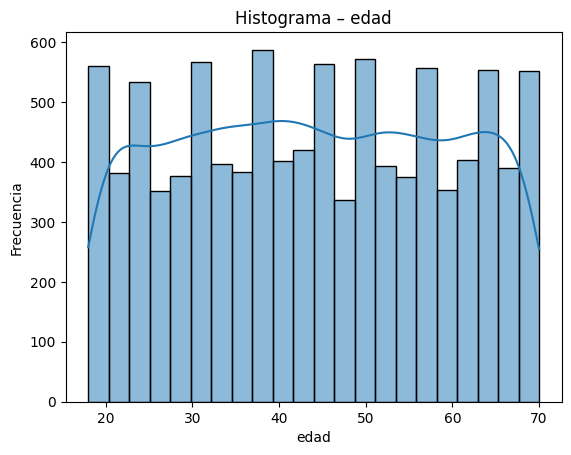

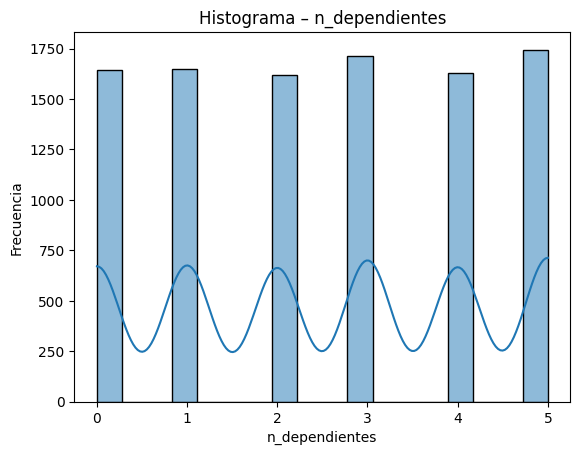

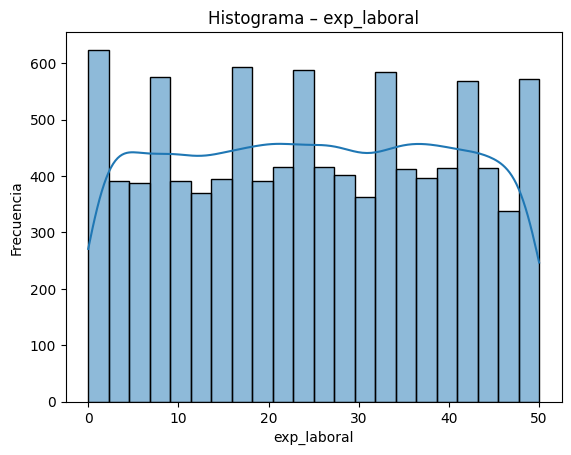

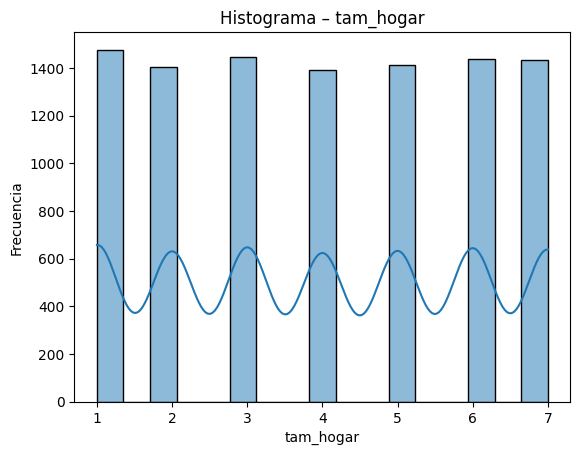

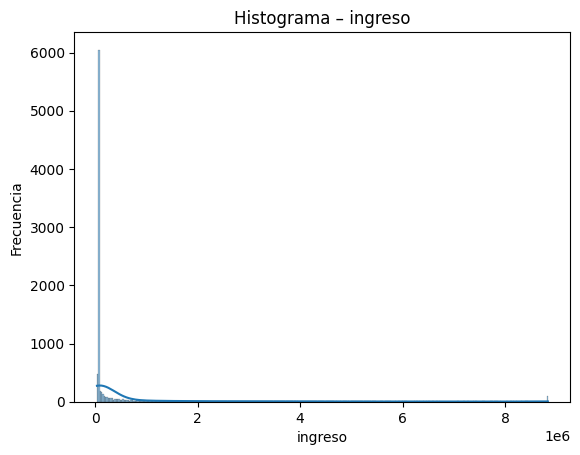

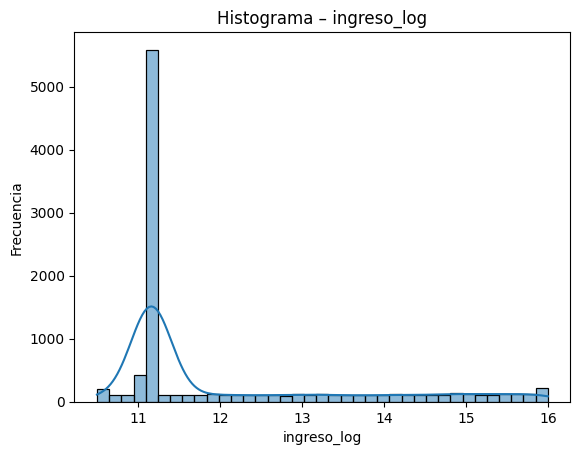

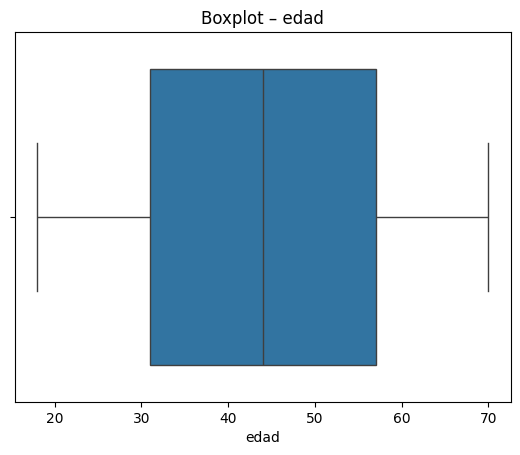

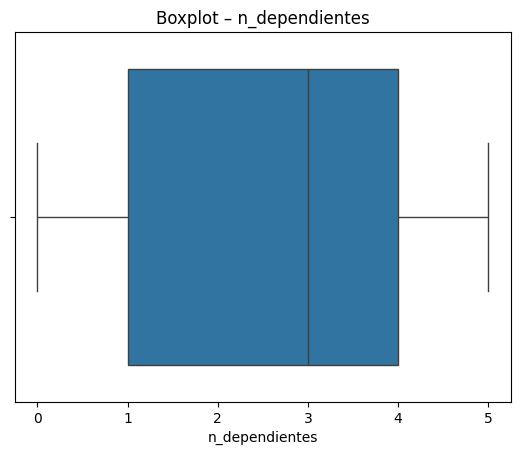

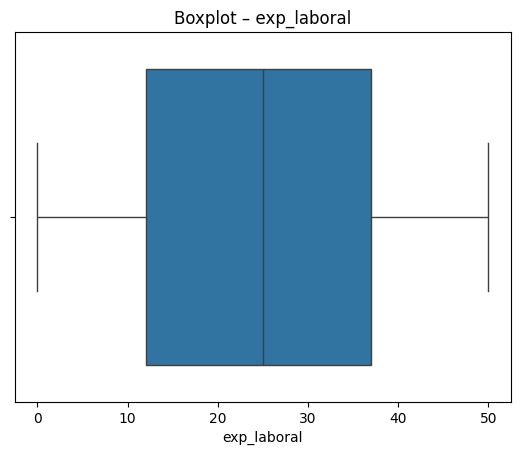

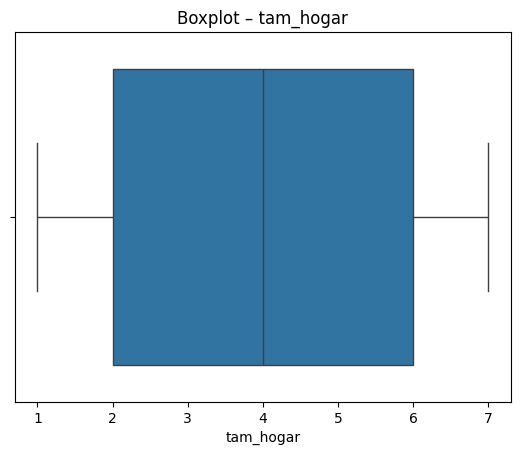

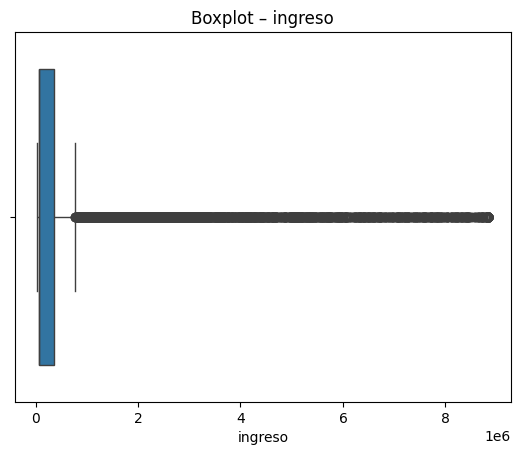

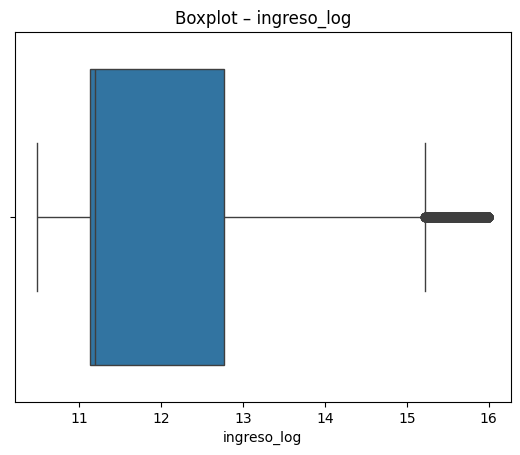

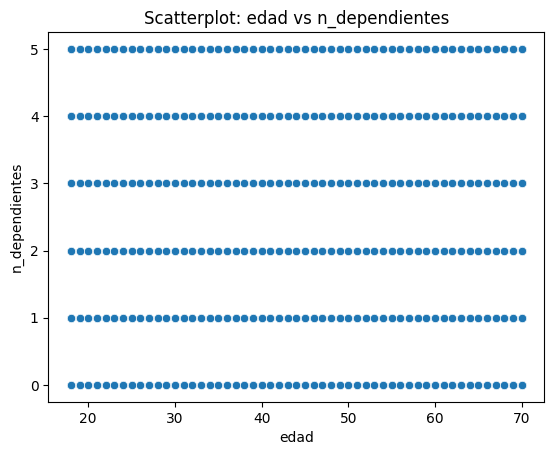

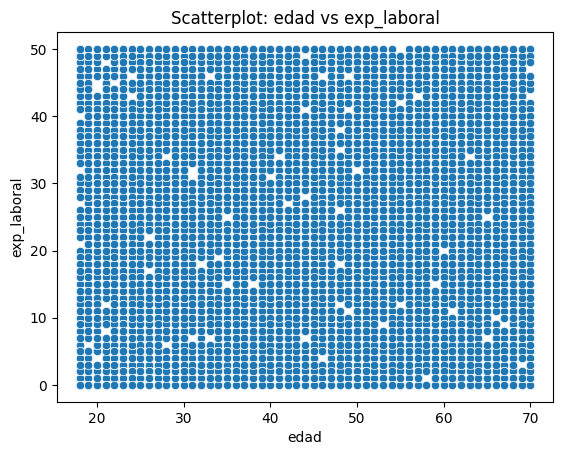

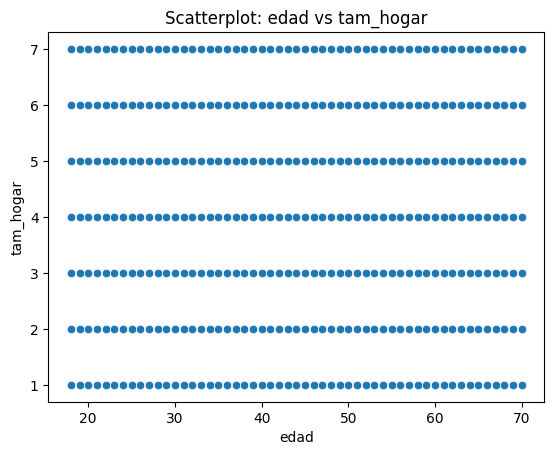

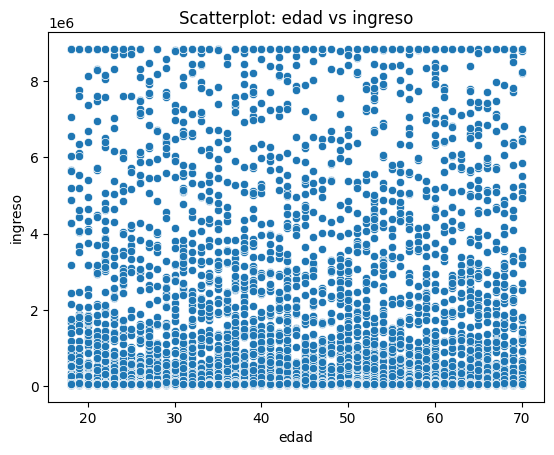

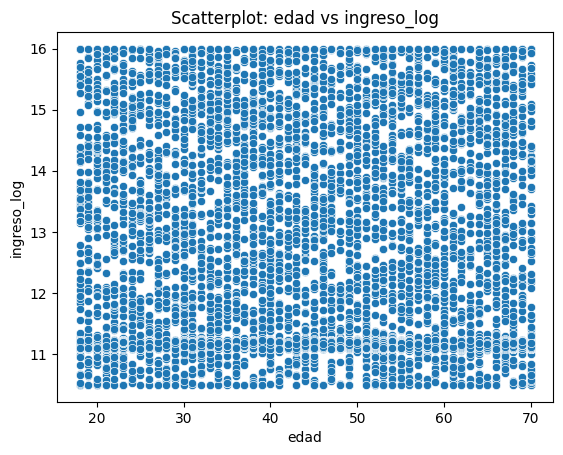

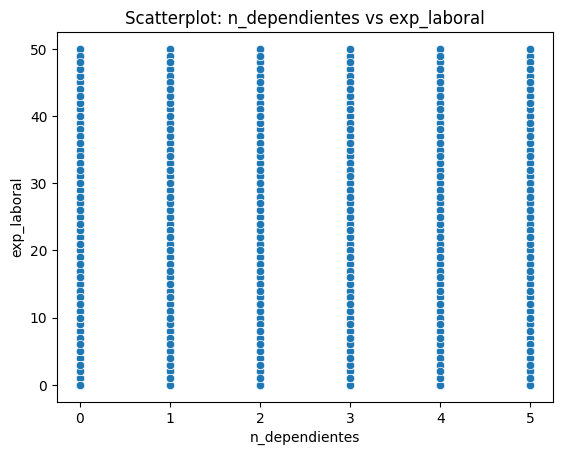

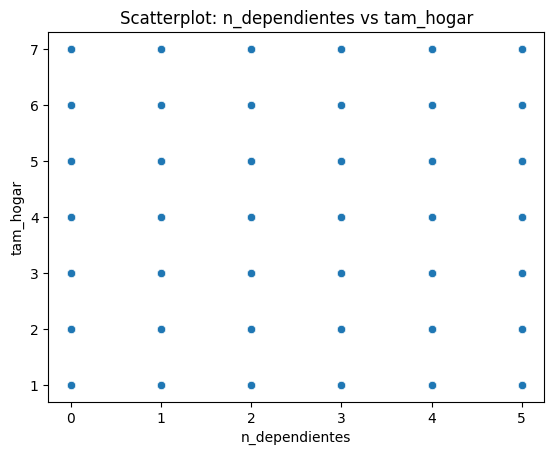

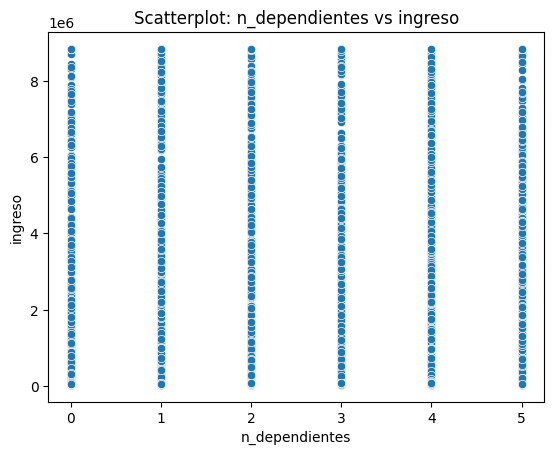

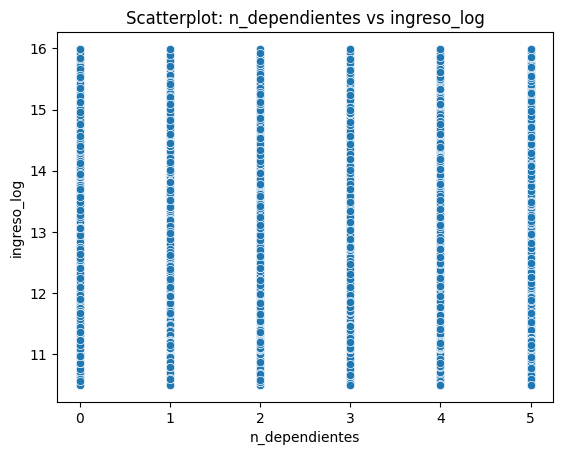

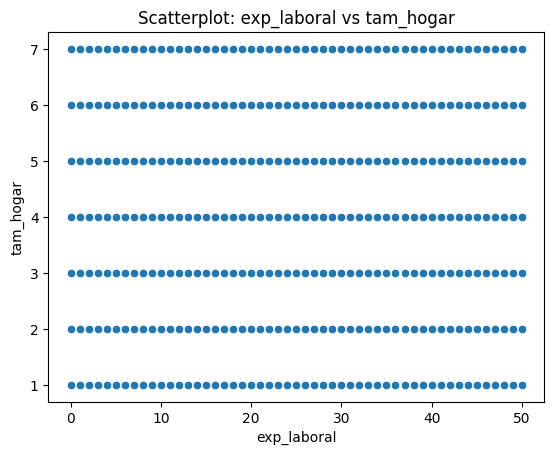

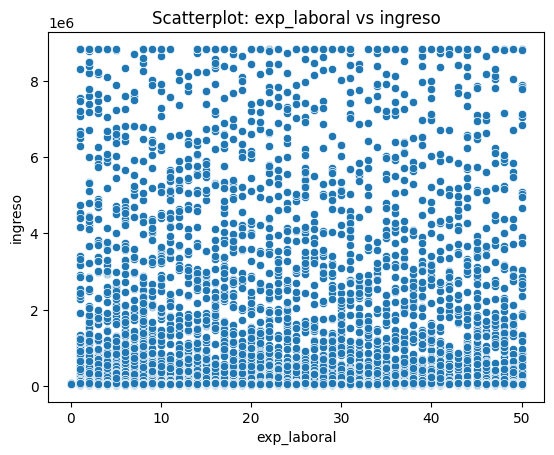

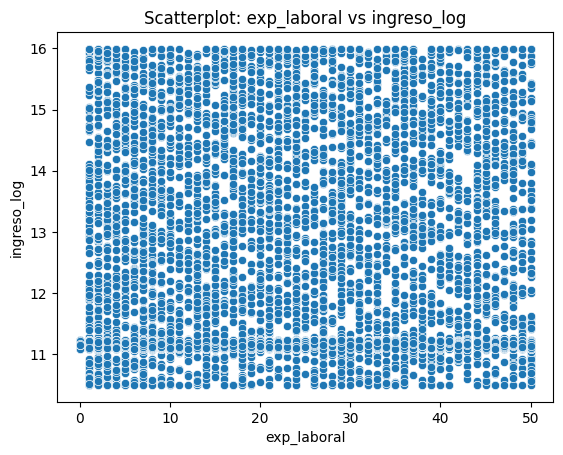

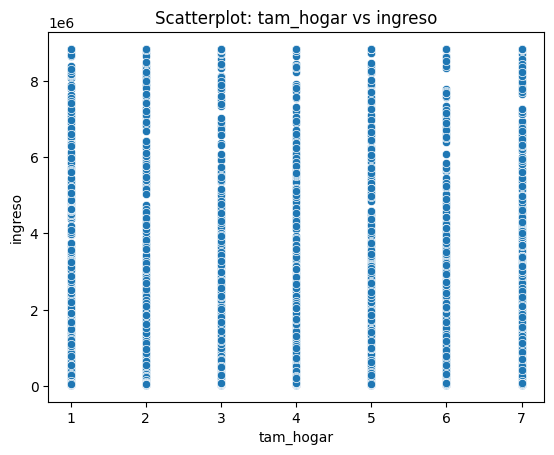

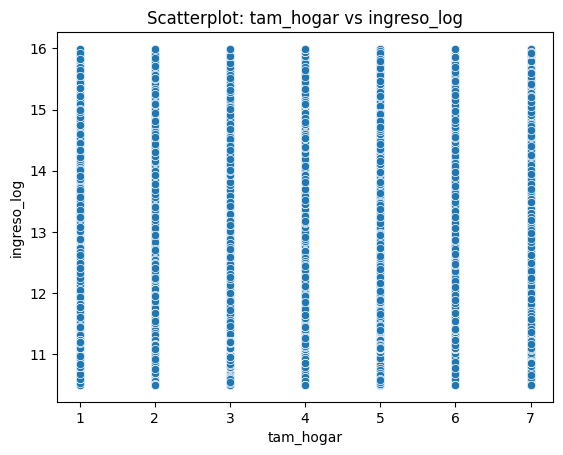

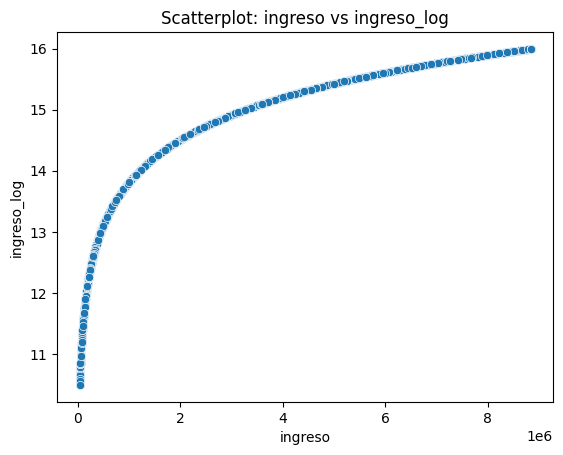

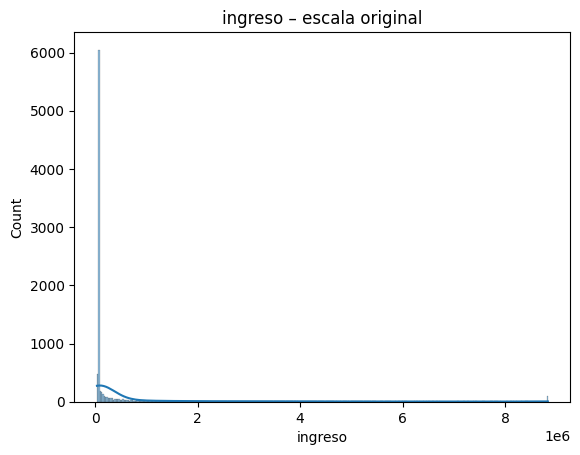

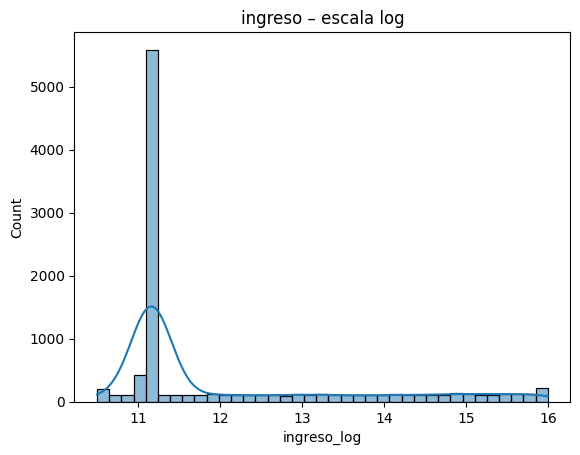

In [13]:

print("\n=== Estadísticos descriptivos ===")
display(data_1[num_cols].describe())



print("\n=== Cuantiles (colas y outliers) ===")
display(
    data_1[num_cols]
    .quantile([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
    .T
)



print("\n=== % Missing por variable ===")
display(
    data_1[num_cols]
    .isna()
    .mean()
    .mul(100)
    .round(2)
)



print("\n=== Top-5 valores más frecuentes (numéricas) ===")
for col in num_cols:
    print(f"\n{col}")
    display(
        data_1[col]
        .value_counts(normalize=True)
        .head(5)
        .mul(100)
        .round(2)
    )



for col in num_cols:
    plt.figure()
    sns.histplot(data_1[col], kde=True)
    plt.title(f"Histograma – {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()



for col in num_cols:
    plt.figure()
    sns.boxplot(x=data_1[col])
    plt.title(f"Boxplot – {col}")
    plt.xlabel(col)
    plt.show()


num_list = list(num_cols)

for i in range(len(num_list)):
    for j in range(i + 1, len(num_list)):
        x, y = num_list[i], num_list[j]
        plt.figure()
        sns.scatterplot(x=data_1[x], y=data_1[y])
        plt.title(f"Scatterplot: {x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()



for col in num_cols:
    log_col = f"{col}_log"
    if log_col in data_1.columns:
        plt.figure()
        sns.histplot(data_1[col], kde=True)
        plt.title(f"{col} – escala original")
        plt.show()

        plt.figure()
        sns.histplot(data_1[log_col], kde=True)
        plt.title(f"{col} – escala log")
        plt.show()


##4.2 Variables Categóricas: Frecuencias y Visualización


=== Cardinalidad por variable categórica ===


,0
nivel_educativo,4
ocupacion,5
zona_residencia,3
estado_civil,3
situacion_laboral,3
tenencia_vivienda,2
tipo_vivienda,3
genero,2
transporte_principal,4



=== Top-10 categorías por variable ===

nivel_educativo


,count
nivel_educativo,
Bachelor's,4058
High School,2959
Master's,2482
Doctorate,501


,proportion
nivel_educativo,
Bachelor's,40.58
High School,29.59
Master's,24.82
Doctorate,5.01



ocupacion


,count
ocupacion,
Healthcare,3035
Technology,2407
Finance,1525
Others,1521
Education,1512


,proportion
ocupacion,
Healthcare,30.35
Technology,24.07
Finance,15.25
Others,15.21
Education,15.12



zona_residencia


,count
zona_residencia,
Urban,7037
Suburban,1951
Rural,1012


,proportion
zona_residencia,
Urban,70.37
Suburban,19.51
Rural,10.12



estado_civil


,count
estado_civil,
Married,5136
Single,3900
Divorced,964


,proportion
estado_civil,
Married,51.36
Single,39.00
Divorced,9.64



situacion_laboral


,count
situacion_laboral,
Full-time,5004
Part-time,3016
Self-employed,1980


,proportion
situacion_laboral,
Full-time,50.04
Part-time,30.16
Self-employed,19.80



tenencia_vivienda


,count
tenencia_vivienda,
Own,6018
Rent,3982


,proportion
tenencia_vivienda,
Own,60.18
Rent,39.82



tipo_vivienda


,count
tipo_vivienda,
Single-family home,4055
Apartment,4001
Townhouse,1944


,proportion
tipo_vivienda,
Single-family home,40.55
Apartment,40.01
Townhouse,19.44



genero


,count
genero,
Male,5123
Female,4877


,proportion
genero,
Male,51.23
Female,48.77



transporte_principal


,count
transporte_principal,
Public transit,4047
Car,2986
Biking,1940
Walking,1027


,proportion
transporte_principal,
Public transit,40.47
Car,29.86
Biking,19.40
Walking,10.27


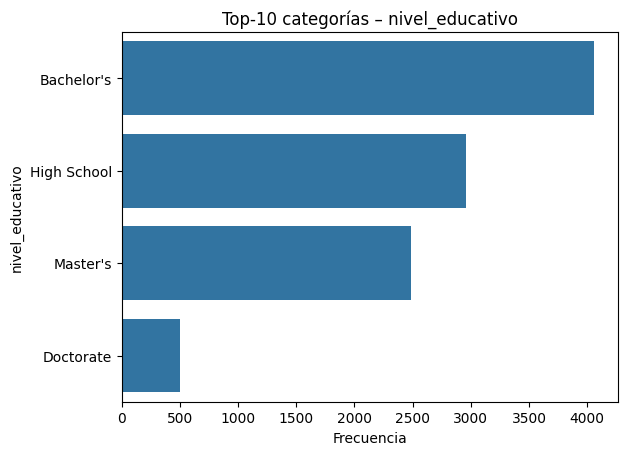

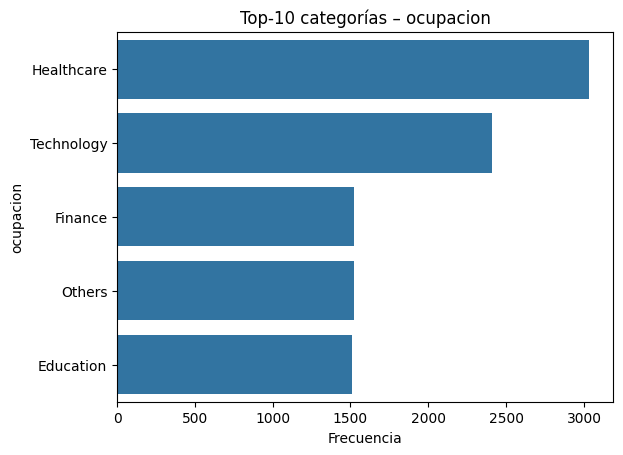

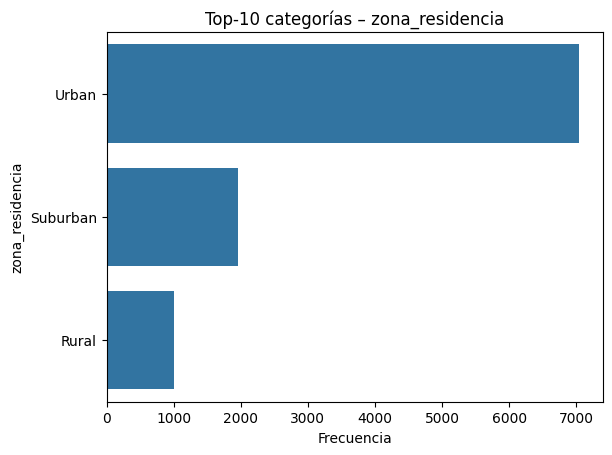

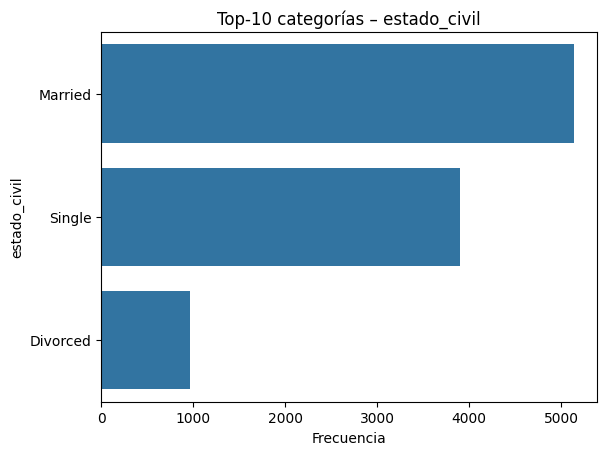

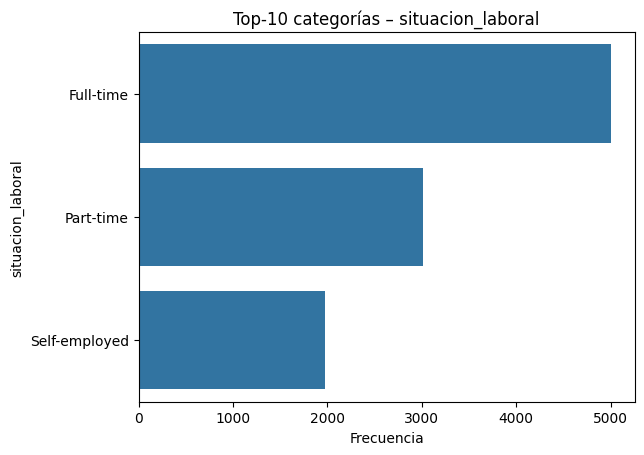

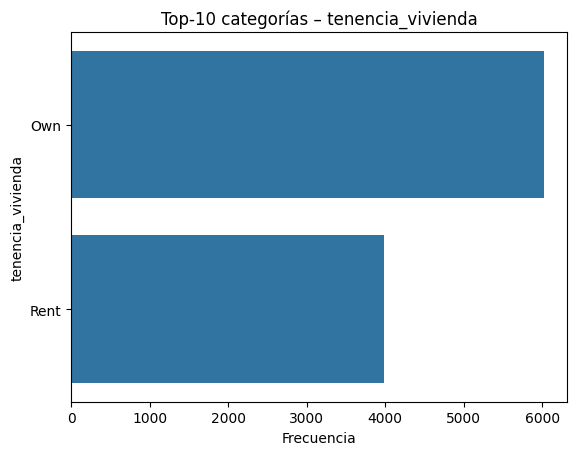

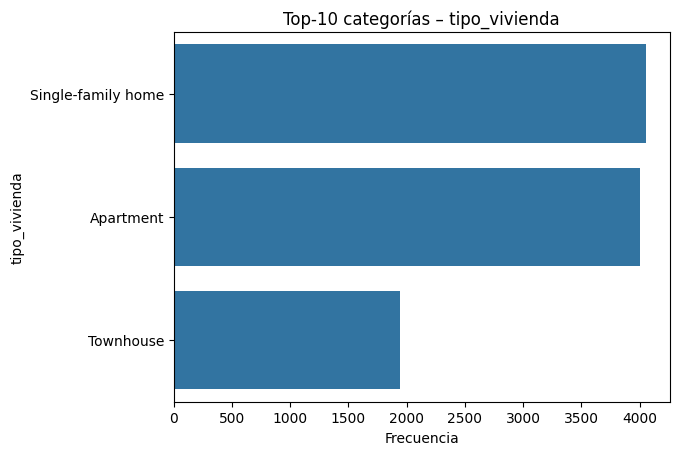

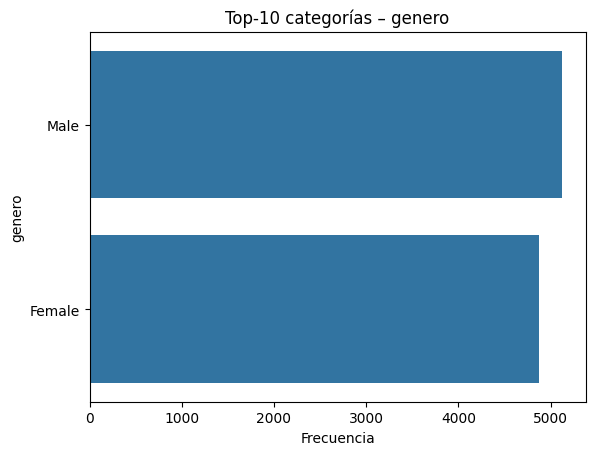

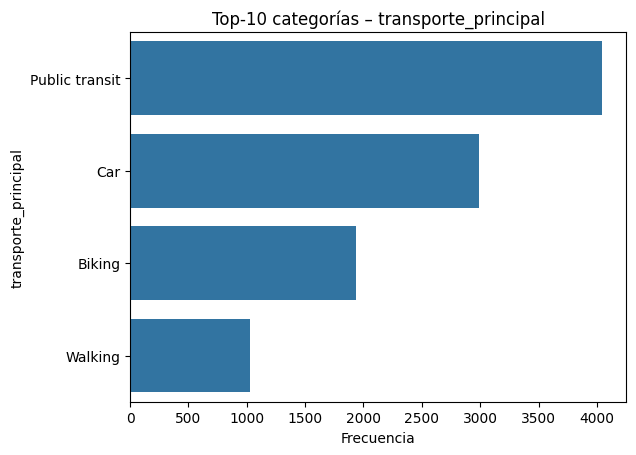


=== Long tail: concentración Top-1 y Top-5 ===

nivel_educativo
% Top-1 : 40.58%
% Top-5 : 100.00%

ocupacion
% Top-1 : 30.35%
% Top-5 : 100.00%

zona_residencia
% Top-1 : 70.37%
% Top-5 : 100.00%

estado_civil
% Top-1 : 51.36%
% Top-5 : 100.00%

situacion_laboral
% Top-1 : 50.04%
% Top-5 : 100.00%

tenencia_vivienda
% Top-1 : 60.18%
% Top-5 : 100.00%

tipo_vivienda
% Top-1 : 40.55%
% Top-5 : 100.00%

genero
% Top-1 : 51.23%
% Top-5 : 100.00%

transporte_principal
% Top-1 : 40.47%
% Top-5 : 100.00%


In [14]:

print("\n=== Cardinalidad por variable categórica ===")
display(
    data_1[cat_cols]
    .nunique(dropna=False)
)



print("\n=== Top-10 categorías por variable ===")
for col in cat_cols:
    print(f"\n{col}")
    display(
        data_1[col]
        .value_counts(dropna=False)
        .head(10)
    )

    display(
        data_1[col]
        .value_counts(normalize=True, dropna=False)
        .head(10)
        .mul(100)
        .round(2)
    )


for col in cat_cols:
    top10 = data_1[col].value_counts(dropna=False).head(10).index

    plt.figure()
    sns.countplot(
        y=data_1[col],
        order=top10
    )
    plt.title(f"Top-10 categorías – {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.show()


print("\n=== Long tail: concentración Top-1 y Top-5 ===")
for col in cat_cols:
    vc = data_1[col].value_counts(normalize=True, dropna=False).mul(100)

    top1 = vc.iloc[0]
    top5 = vc.iloc[:5].sum()

    print(f"\n{col}")
    print(f"% Top-1 : {top1:.2f}%")
    print(f"% Top-5 : {top5:.2f}%")


#5. Análisis Exploratorio Bivariado (EDA): Variables Explicativas vs Target


##5.1 Variables Numéricas vs Target

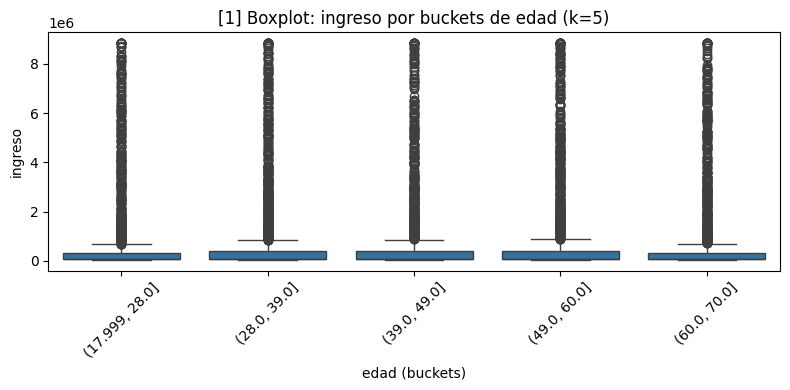


=== edad | Buckets (k=5) | TABLA COMPLETA (n, mean, median) ===


,n,mean,median
edad,,,
"(17.999, 28.0]",2009,763697.877755,72900.0
"(28.0, 39.0]",2126,848662.957747,72897.0
"(39.0, 49.0]",1920,771292.186542,73028.0
"(49.0, 60.0]",2047,858499.065305,73216.0
"(60.0, 70.0]",1898,809594.905469,72748.0


--- [2] edad: Tabla SOLO MEAN ---


,n,mean
edad,,
"(17.999, 28.0]",2009,763697.877755
"(28.0, 39.0]",2126,848662.957747
"(39.0, 49.0]",1920,771292.186542
"(49.0, 60.0]",2047,858499.065305
"(60.0, 70.0]",1898,809594.905469


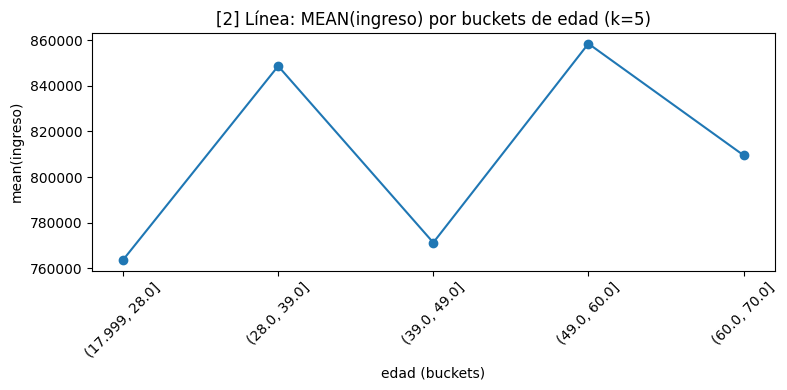

--- [3] edad: Tabla SOLO MEDIAN ---


,n,median
edad,,
"(17.999, 28.0]",2009,72900.0
"(28.0, 39.0]",2126,72897.0
"(39.0, 49.0]",1920,73028.0
"(49.0, 60.0]",2047,73216.0
"(60.0, 70.0]",1898,72748.0


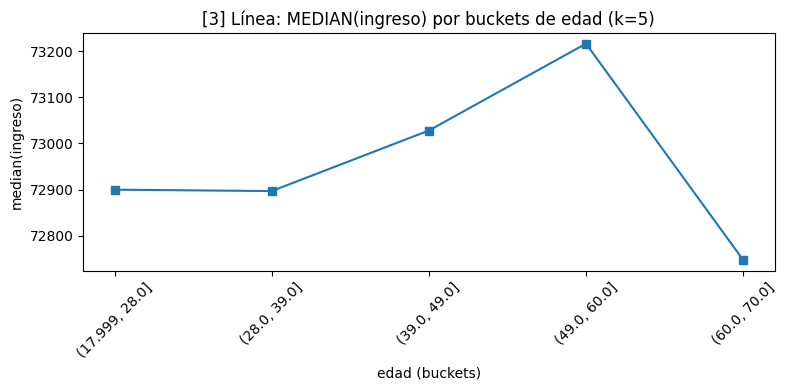

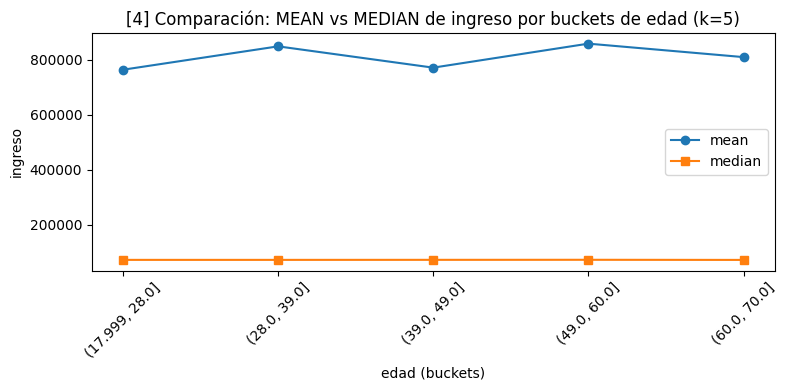

[5] Tendencia (por buckets) - edad:
    mean:   no monotónica
    median: no monotónica
    Spearman sobre buckets (mean):   rho=0.500, p=0.3910
    Spearman sobre buckets (median): rho=-0.100, p=0.8729


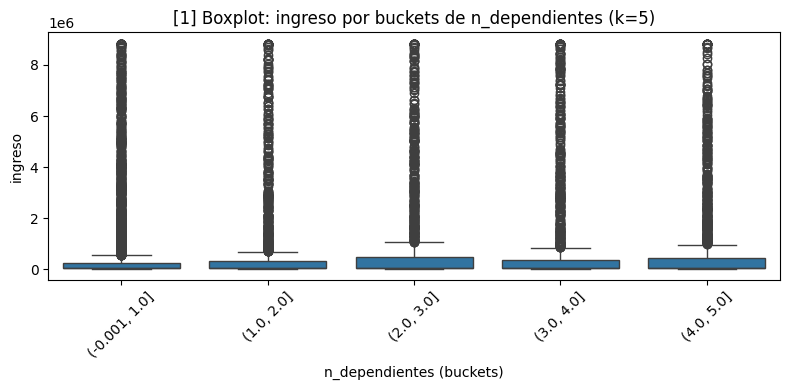


=== n_dependientes | Buckets (k=5) | TABLA COMPLETA (n, mean, median) ===


,n,mean,median
n_dependientes,,,
"(-0.001, 1.0]",3293,780173.216283,72664.0
"(1.0, 2.0]",1621,779210.166015,72882.0
"(2.0, 3.0]",1712,877422.785175,73070.0
"(3.0, 4.0]",1629,853456.670092,73228.0
"(4.0, 5.0]",1745,795832.318550,73162.0


--- [2] n_dependientes: Tabla SOLO MEAN ---


,n,mean
n_dependientes,,
"(-0.001, 1.0]",3293,780173.216283
"(1.0, 2.0]",1621,779210.166015
"(2.0, 3.0]",1712,877422.785175
"(3.0, 4.0]",1629,853456.670092
"(4.0, 5.0]",1745,795832.318550


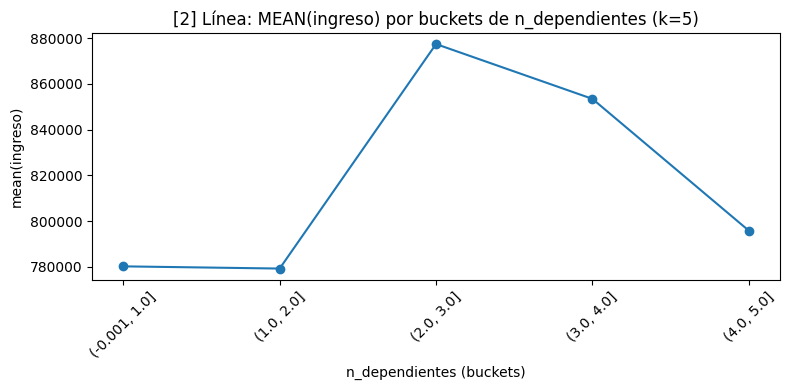

--- [3] n_dependientes: Tabla SOLO MEDIAN ---


,n,median
n_dependientes,,
"(-0.001, 1.0]",3293,72664.0
"(1.0, 2.0]",1621,72882.0
"(2.0, 3.0]",1712,73070.0
"(3.0, 4.0]",1629,73228.0
"(4.0, 5.0]",1745,73162.0


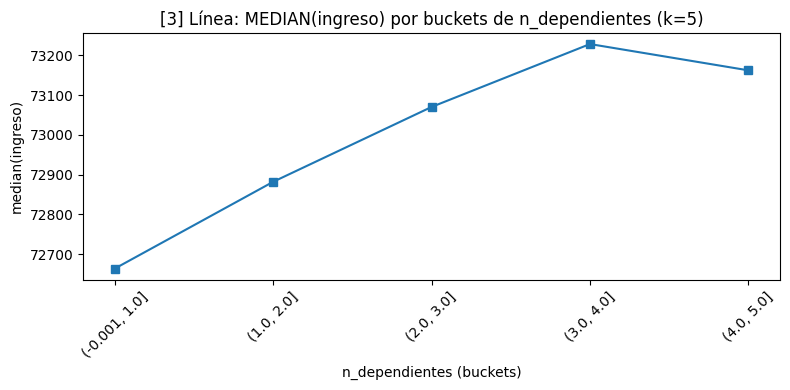

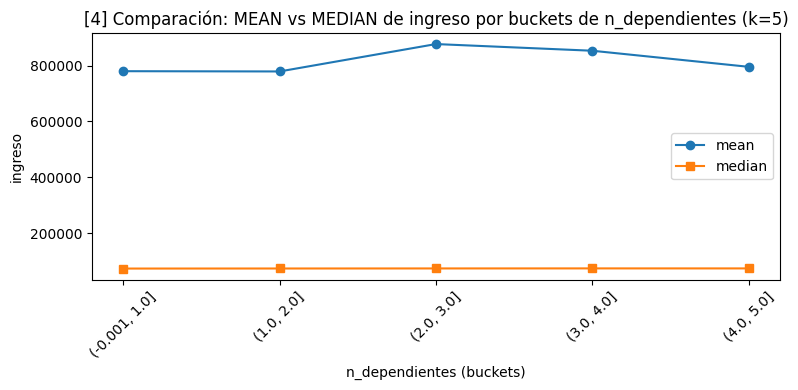

[5] Tendencia (por buckets) - n_dependientes:
    mean:   no monotónica
    median: no monotónica
    Spearman sobre buckets (mean):   rho=0.500, p=0.3910
    Spearman sobre buckets (median): rho=0.900, p=0.0374


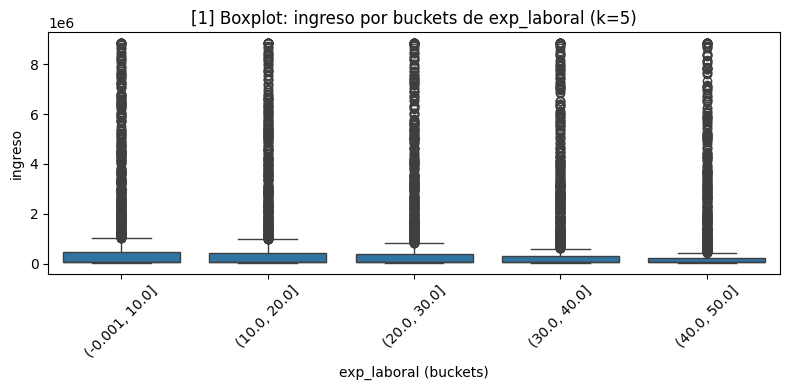


=== exp_laboral | Buckets (k=5) | TABLA COMPLETA (n, mean, median) ===


,n,mean,median
exp_laboral,,,
"(-0.001, 10.0]",2179,851965.843107,73552.0
"(10.0, 20.0]",1941,880510.773436,73562.0
"(20.0, 30.0]",2002,839768.729006,73023.0
"(30.0, 40.0]",1987,765381.152642,72598.0
"(40.0, 50.0]",1891,711703.792099,72156.0


--- [2] exp_laboral: Tabla SOLO MEAN ---


,n,mean
exp_laboral,,
"(-0.001, 10.0]",2179,851965.843107
"(10.0, 20.0]",1941,880510.773436
"(20.0, 30.0]",2002,839768.729006
"(30.0, 40.0]",1987,765381.152642
"(40.0, 50.0]",1891,711703.792099


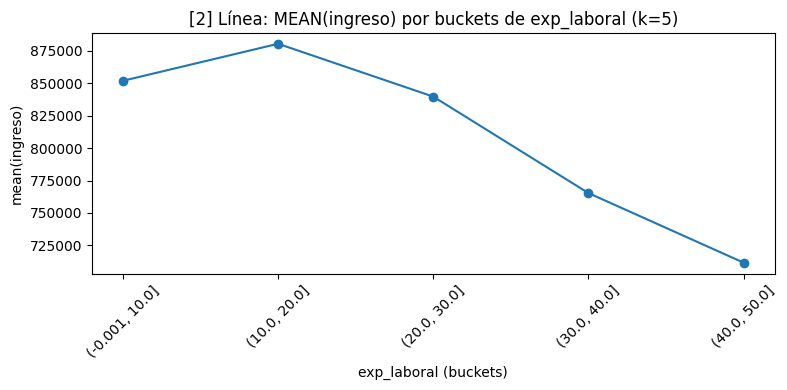

--- [3] exp_laboral: Tabla SOLO MEDIAN ---


,n,median
exp_laboral,,
"(-0.001, 10.0]",2179,73552.0
"(10.0, 20.0]",1941,73562.0
"(20.0, 30.0]",2002,73023.0
"(30.0, 40.0]",1987,72598.0
"(40.0, 50.0]",1891,72156.0


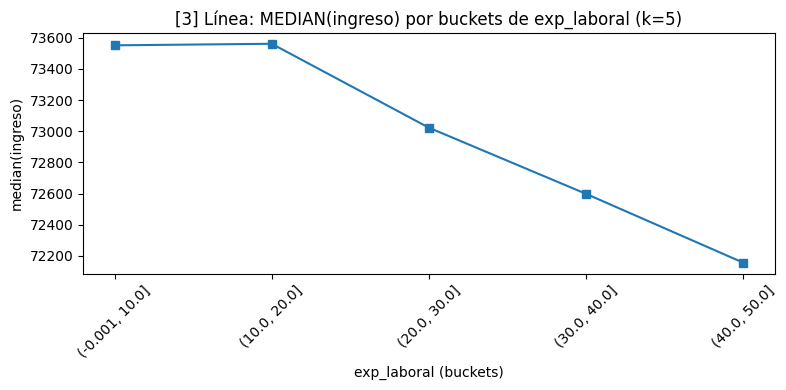

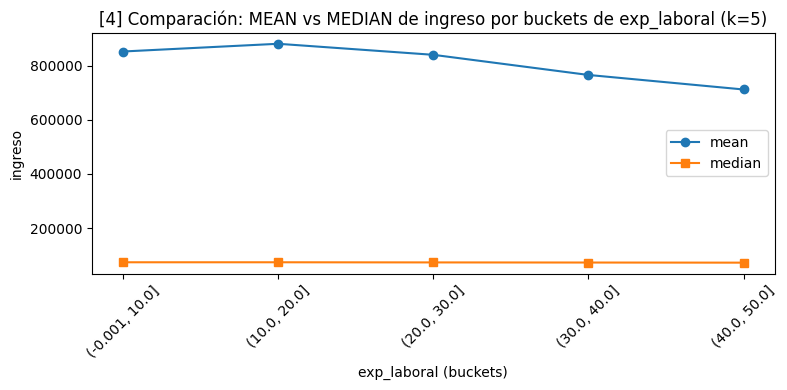

[5] Tendencia (por buckets) - exp_laboral:
    mean:   no monotónica
    median: no monotónica
    Spearman sobre buckets (mean):   rho=-0.900, p=0.0374
    Spearman sobre buckets (median): rho=-0.900, p=0.0374


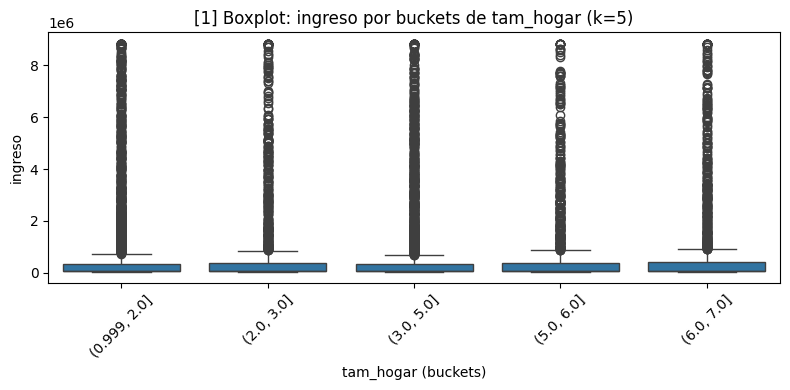


=== tam_hogar | Buckets (k=5) | TABLA COMPLETA (n, mean, median) ===


,n,mean,median
tam_hogar,,,
"(0.999, 2.0]",2883,844372.812435,72892.0
"(2.0, 3.0]",1445,828742.127834,73230.0
"(3.0, 5.0]",2802,793915.298754,73002.0
"(5.0, 6.0]",1437,728098.290682,72736.0
"(6.0, 7.0]",1433,844856.312777,73038.0


--- [2] tam_hogar: Tabla SOLO MEAN ---


,n,mean
tam_hogar,,
"(0.999, 2.0]",2883,844372.812435
"(2.0, 3.0]",1445,828742.127834
"(3.0, 5.0]",2802,793915.298754
"(5.0, 6.0]",1437,728098.290682
"(6.0, 7.0]",1433,844856.312777


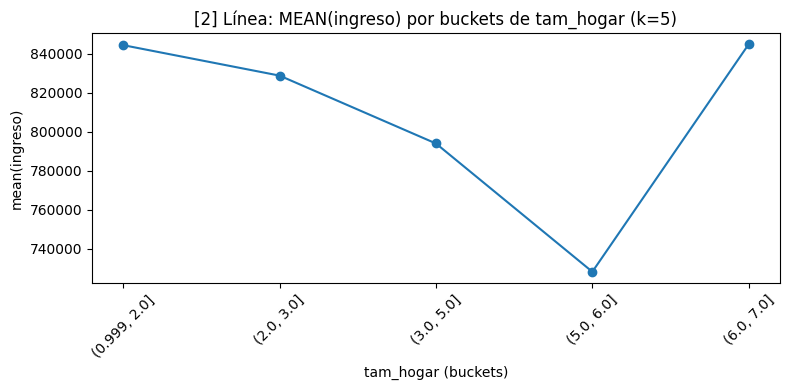

--- [3] tam_hogar: Tabla SOLO MEDIAN ---


,n,median
tam_hogar,,
"(0.999, 2.0]",2883,72892.0
"(2.0, 3.0]",1445,73230.0
"(3.0, 5.0]",2802,73002.0
"(5.0, 6.0]",1437,72736.0
"(6.0, 7.0]",1433,73038.0


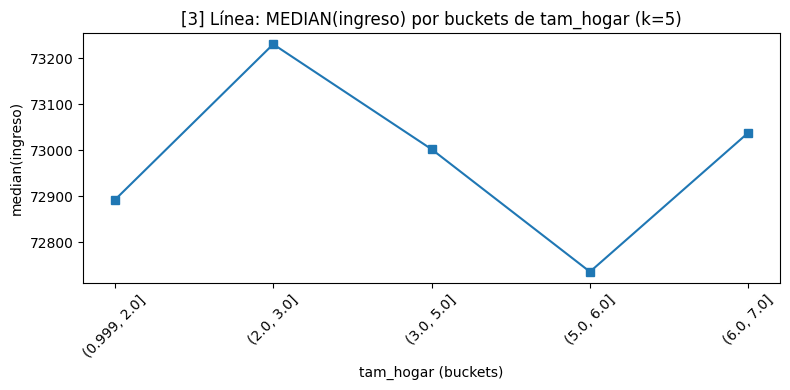

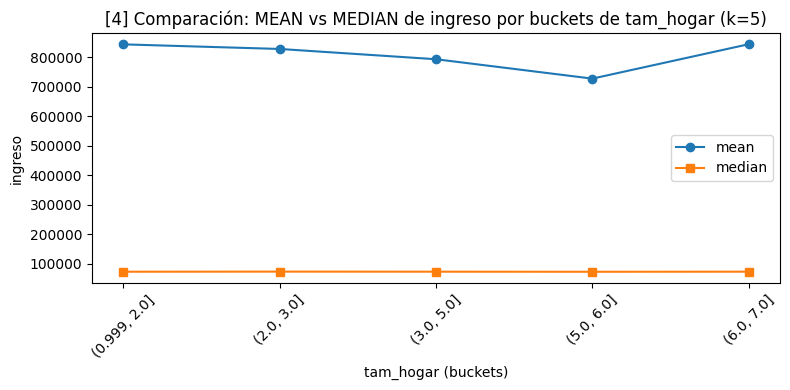

[5] Tendencia (por buckets) - tam_hogar:
    mean:   no monotónica
    median: no monotónica
    Spearman sobre buckets (mean):   rho=0.000, p=1.0000
    Spearman sobre buckets (median): rho=0.000, p=1.0000

=== Correlación Pearson con ingreso (extra) ===


,ingreso
ingreso,1.000000
ingreso_log,0.863343
n_dependientes,0.011922
edad,0.008682
tam_hogar,-0.011211
exp_laboral,-0.027793



=== Correlación Spearman con ingreso (extra) ===


,ingreso
ingreso,1.000000
ingreso_log,1.000000
n_dependientes,0.020135
edad,0.000598
tam_hogar,0.000254
exp_laboral,-0.050146



=== VIF por variable numérica (extra) ===


,VIF
edad,5.140345
tam_hogar,3.906055
exp_laboral,3.275004
n_dependientes,2.790483



=== Test ANOVA por buckets (extra) ===
edad: F=1.18, p-value=0.3192
n_dependientes: F=1.21, p-value=0.3023
exp_laboral: F=2.91, p-value=0.0203
tam_hogar: F=1.24, p-value=0.2910


In [15]:

target_col = "ingreso"

num_cols = data_1.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ["ingreso", "ingreso_log"]
X_cols = [c for c in num_cols if c not in exclude_cols]

def trend_label(vals, tol=1e-12):
    """Clasifica tendencia de una secuencia ordenada por buckets."""
    vals = np.asarray(vals, dtype=float)
    diffs = np.diff(vals)
    inc = np.all(diffs >= -tol)
    dec = np.all(diffs <=  tol)
    if inc and not dec:
        return "creciente"
    if dec and not inc:
        return "decreciente"
    if inc and dec:
        return "plana"
    return "no monotónica"


for col in X_cols:

    buckets = pd.qcut(data_1[col], q=5, duplicates="drop")
    k = buckets.nunique()


    plt.figure(figsize=(8, 4))
    sns.boxplot(x=buckets, y=data_1[target_col], order=buckets.cat.categories)
    plt.title(f"[1] Boxplot: {target_col} por buckets de {col} (k={k})")
    plt.xlabel(f"{col} (buckets)")
    plt.ylabel(target_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    stats_bucket = (
        data_1.groupby(buckets, observed=True)[target_col]
              .agg(n="size", mean="mean", median="median")
    )

    print(f"\n=== {col} | Buckets (k={k}) | TABLA COMPLETA (n, mean, median) ===")
    display(stats_bucket)


    print(f"--- [2] {col}: Tabla SOLO MEAN ---")
    display(stats_bucket[["n", "mean"]])

    plt.figure(figsize=(8, 4))
    plt.plot(stats_bucket.index.astype(str), stats_bucket["mean"], marker="o")
    plt.title(f"[2] Línea: MEAN({target_col}) por buckets de {col} (k={k})")
    plt.xlabel(f"{col} (buckets)")
    plt.ylabel(f"mean({target_col})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    print(f"--- [3] {col}: Tabla SOLO MEDIAN ---")
    display(stats_bucket[["n", "median"]])

    plt.figure(figsize=(8, 4))
    plt.plot(stats_bucket.index.astype(str), stats_bucket["median"], marker="s")
    plt.title(f"[3] Línea: MEDIAN({target_col}) por buckets de {col} (k={k})")
    plt.xlabel(f"{col} (buckets)")
    plt.ylabel(f"median({target_col})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(8, 4))
    plt.plot(stats_bucket.index.astype(str), stats_bucket["mean"], marker="o", label="mean")
    plt.plot(stats_bucket.index.astype(str), stats_bucket["median"], marker="s", label="median")
    plt.title(f"[4] Comparación: MEAN vs MEDIAN de {target_col} por buckets de {col} (k={k})")
    plt.xlabel(f"{col} (buckets)")
    plt.ylabel(target_col)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    t_mean = trend_label(stats_bucket["mean"].values)
    t_med  = trend_label(stats_bucket["median"].values)


    print(f"[5] Tendencia (por buckets) - {col}:")
    print(f"    mean:   {t_mean}")
    print(f"    median: {t_med}")


    bucket_rank = np.arange(1, len(stats_bucket) + 1)
    rho_mean, p_mean = stats.spearmanr(bucket_rank, stats_bucket["mean"].values)
    rho_med,  p_med  = stats.spearmanr(bucket_rank, stats_bucket["median"].values)
    print(f"    Spearman sobre buckets (mean):   rho={rho_mean:.3f}, p={p_mean:.4f}")
    print(f"    Spearman sobre buckets (median): rho={rho_med:.3f}, p={p_med:.4f}")




print("\n=== Correlación Pearson con ingreso (extra) ===")
display(data_1[num_cols].corr(method="pearson")[target_col].sort_values(ascending=False))

print("\n=== Correlación Spearman con ingreso (extra) ===")
display(data_1[num_cols].corr(method="spearman")[target_col].sort_values(ascending=False))

X = data_1[X_cols].dropna()
if X.shape[1] > 1:
    vif_vals = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\n=== VIF por variable numérica (extra) ===")
    display(pd.Series(vif_vals, index=X.columns, name="VIF").sort_values(ascending=False))

print("\n=== Test ANOVA por buckets (extra) ===")
for col in X_cols:
    buckets = pd.qcut(data_1[col], q=5, duplicates="drop")
    cats = buckets.cat.categories
    groups = [data_1.loc[buckets == b, target_col].values for b in cats]
    groups = [g for g in groups if len(g) > 1]
    if len(groups) > 1:
        f_stat, pval = stats.f_oneway(*groups)
        print(f"{col}: F={f_stat:.2f}, p-value={pval:.4f}")



##5.2 Variables Categóricas vs Target


CATEGÓRICA: nivel_educativo

--- Target medio / mediano por categoría ---


,mean,median
nivel_educativo,,
High School,864617.802677,73452.0
Bachelor's,805135.536577,72888.0
Master's,796138.294762,72747.0
Doctorate,622169.394910,71346.0


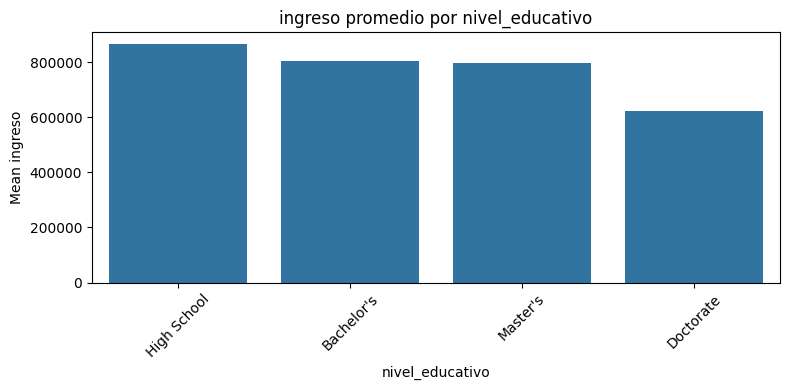


--- Registros por categoría (n y %) ---


,n,pct
nivel_educativo,,
Bachelor's,4058,40.58
High School,2959,29.59
Master's,2482,24.82
Doctorate,501,5.01



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
nivel_educativo,,,,
Bachelor's,1.786156e+06,68377.0,367942.50,299565.50
Doctorate,1.593039e+06,67538.0,75392.00,7854.00
High School,1.849748e+06,68677.0,444736.00,376059.00
Master's,1.781204e+06,68390.0,315053.25,246663.25


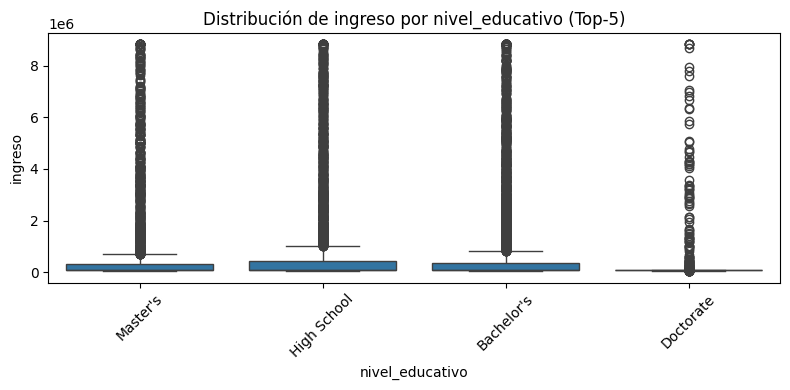


CATEGÓRICA: ocupacion

--- Target medio / mediano por categoría ---


,mean,median
ocupacion,,
Education,914794.344107,73317.0
Technology,831466.277798,72650.0
Others,825338.564589,73428.0
Healthcare,792168.344306,73146.0
Finance,701171.763502,72228.0


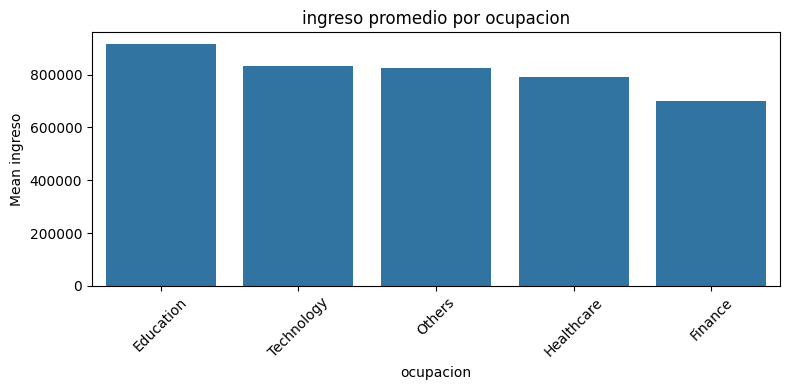


--- Registros por categoría (n y %) ---


,n,pct
ocupacion,,
Healthcare,3035,30.35
Technology,2407,24.07
Finance,1525,15.25
Others,1521,15.21
Education,1512,15.12



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
ocupacion,,,,
Education,1.922615e+06,68717.0,553278.25,484561.25
Finance,1.649979e+06,68126.0,185614.00,117488.00
Healthcare,1.762841e+06,68657.0,372317.50,303660.50
Others,1.771113e+06,68404.0,412832.00,344428.00
Technology,1.853281e+06,68215.0,289959.50,221744.50


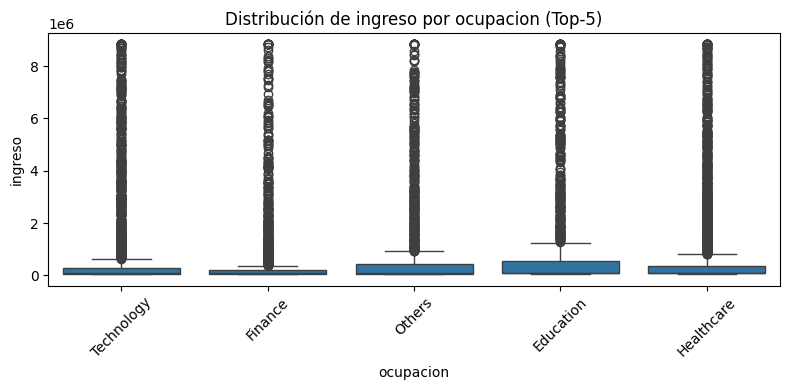


CATEGÓRICA: zona_residencia

--- Target medio / mediano por categoría ---


,mean,median
zona_residencia,,
Rural,1.042039e+06,74815.0
Suburban,9.144761e+05,73198.0
Urban,7.495638e+05,72664.0


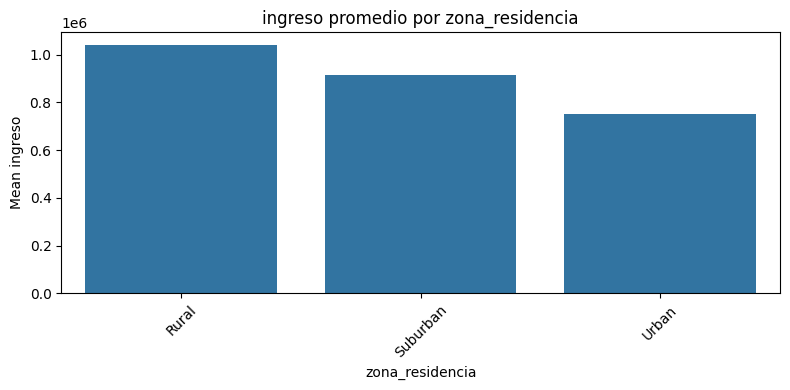


--- Registros por categoría (n y %) ---


,n,pct
zona_residencia,,
Urban,7037,70.37
Suburban,1951,19.51
Rural,1012,10.12



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
zona_residencia,,,,
Rural,1.998697e+06,68882.5,837697.5,768815.0
Suburban,1.930293e+06,68630.0,492754.0,424124.0
Urban,1.720429e+06,68326.0,271029.0,202703.0


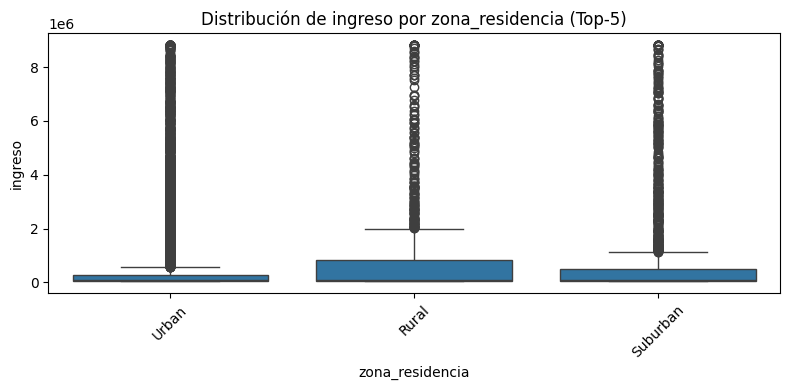


CATEGÓRICA: estado_civil

--- Target medio / mediano por categoría ---


,mean,median
estado_civil,,
Married,833617.586046,72919.0
Single,790286.510272,72936.0
Divorced,777789.302915,73112.0


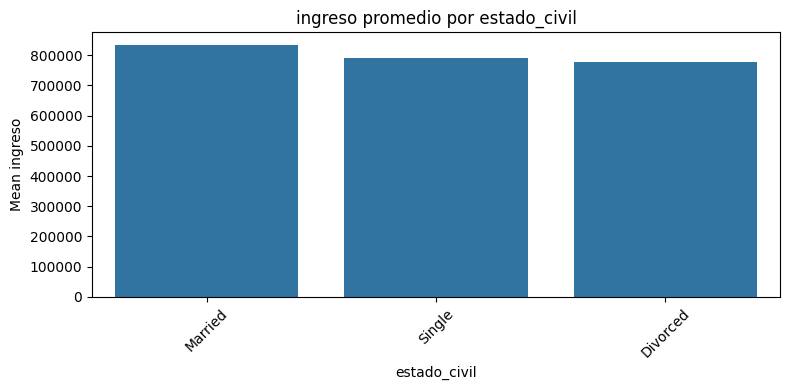


--- Registros por categoría (n y %) ---


,n,pct
estado_civil,,
Married,5136,51.36
Single,3900,39.00
Divorced,964,9.64



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
estado_civil,,,,
Divorced,1.703112e+06,68513.5,366789.50,298276.00
Married,1.824986e+06,68455.5,347738.75,279283.25
Single,1.778336e+06,68404.0,345555.00,277151.00


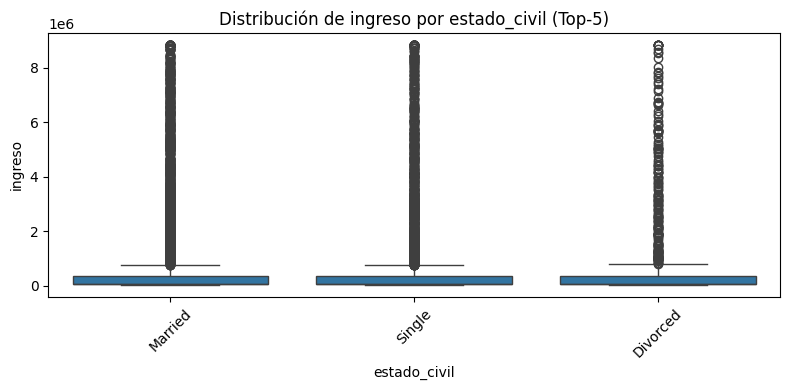


CATEGÓRICA: situacion_laboral

--- Target medio / mediano por categoría ---


,mean,median
situacion_laboral,,
Part-time,899087.669503,73512.0
Full-time,775491.104716,72812.0
Self-employed,768262.778172,72616.0


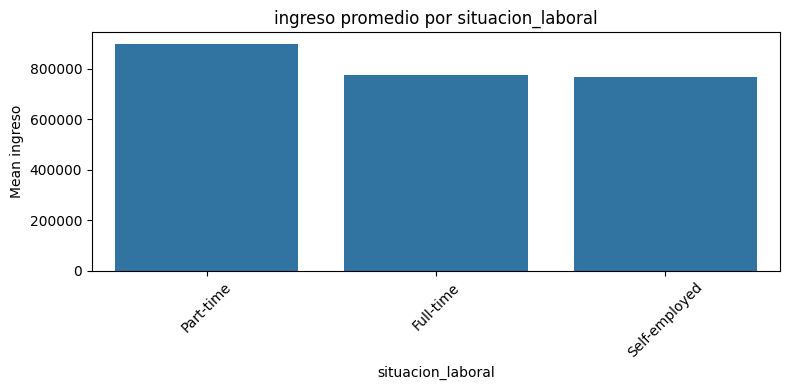


--- Registros por categoría (n y %) ---


,n,pct
situacion_laboral,,
Full-time,5004,50.04
Part-time,3016,30.16
Self-employed,1980,19.80



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
situacion_laboral,,,,
Full-time,1.735073e+06,68316.0,342163.00,273847.00
Part-time,1.901768e+06,68757.5,451588.25,382830.75
Self-employed,1.774627e+06,68273.0,241292.50,173019.50


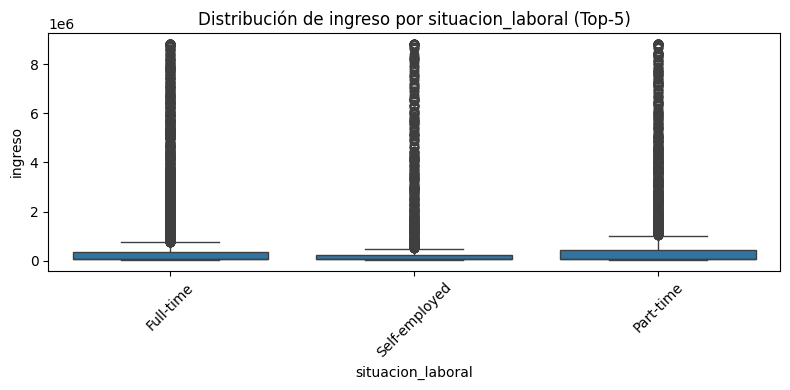


CATEGÓRICA: tenencia_vivienda

--- Target medio / mediano por categoría ---


,mean,median
tenencia_vivienda,,
Rent,951062.952903,75328.0
Own,718882.273436,71921.0


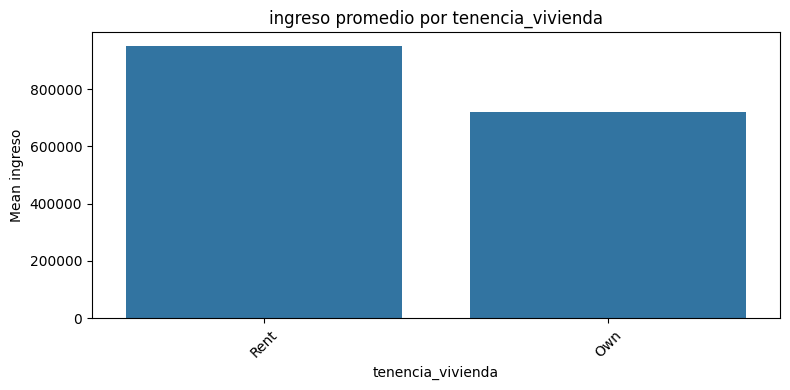


--- Registros por categoría (n y %) ---


,n,pct
tenencia_vivienda,,
Own,6018,60.18
Rent,3982,39.82



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
tenencia_vivienda,,,,
Own,1.745468e+06,68034.0,111405.00,43371.00
Rent,1.859868e+06,69267.5,727809.25,658541.75


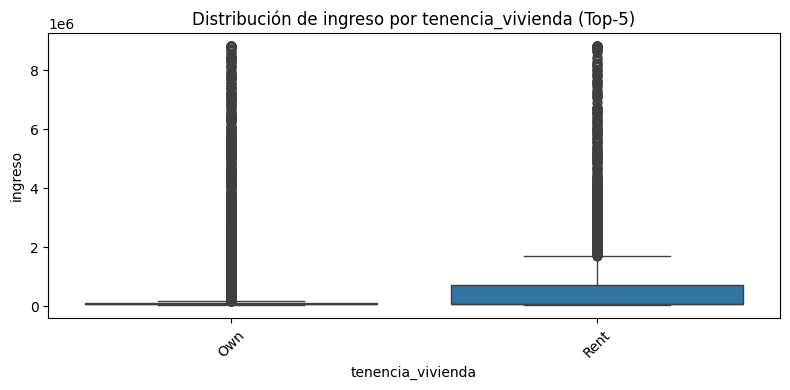


CATEGÓRICA: tipo_vivienda

--- Target medio / mediano por categoría ---


,mean,median
tipo_vivienda,,
Apartment,867675.931787,73556.0
Single-family home,788437.578212,72658.0
Townhouse,743148.362793,72575.0


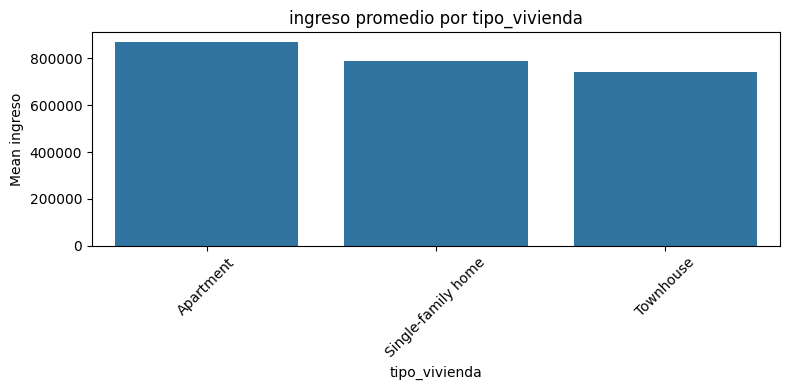


--- Registros por categoría (n y %) ---


,n,pct
tipo_vivienda,,
Single-family home,4055,40.55
Apartment,4001,40.01
Townhouse,1944,19.44



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
tipo_vivienda,,,,
Apartment,1.851423e+06,68666.0,446952.00,378286.00
Single-family home,1.759470e+06,68194.0,316629.00,248435.00
Townhouse,1.749436e+06,68452.5,213669.75,145217.25


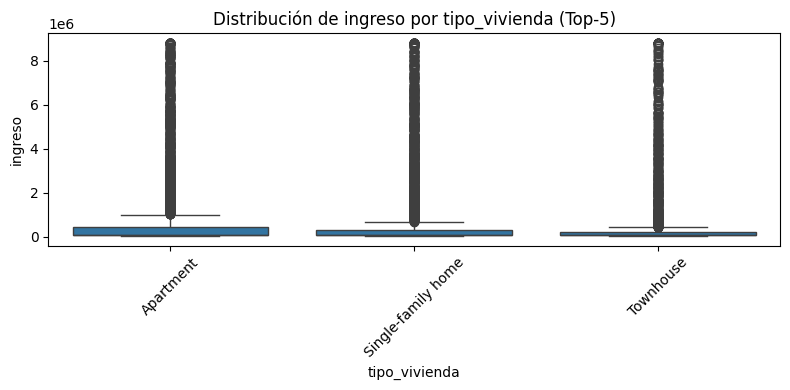


CATEGÓRICA: genero

--- Target medio / mediano por categoría ---


,mean,median
genero,,
Female,815343.12316,72800.0
Male,807522.50407,73100.0


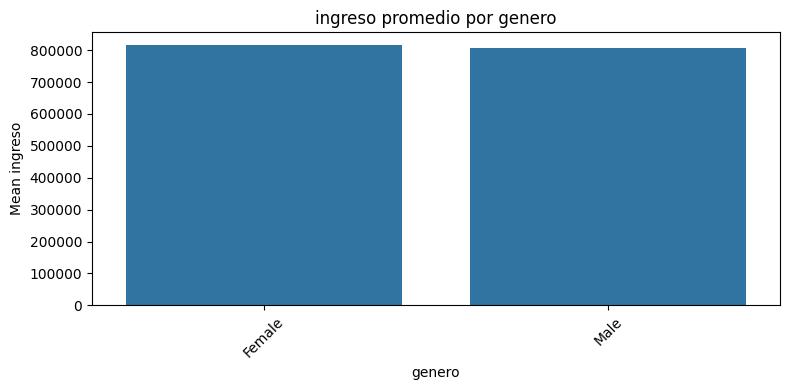


--- Registros por categoría (n y %) ---


,n,pct
genero,,
Male,5123,51.23
Female,4877,48.77



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
genero,,,,
Female,1.801239e+06,68326.0,331574.0,263248.0
Male,1.790005e+06,68545.0,373394.0,304849.0


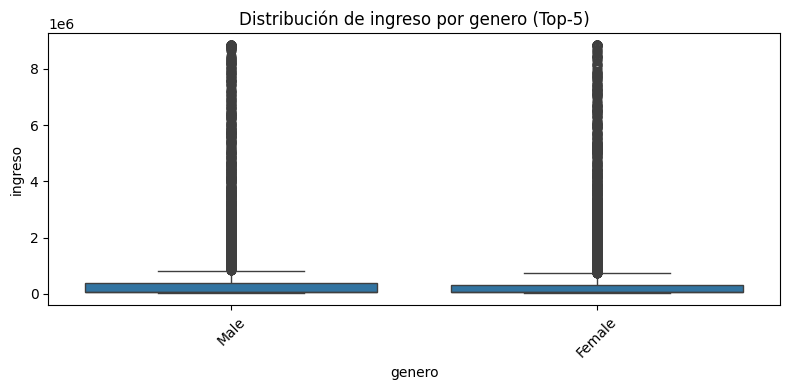


CATEGÓRICA: transporte_principal

--- Target medio / mediano por categoría ---


,mean,median
transporte_principal,,
Biking,842073.460088,73242.0
Walking,825607.878296,72956.0
Public transit,817161.331853,72834.0
Car,778564.128068,72937.0


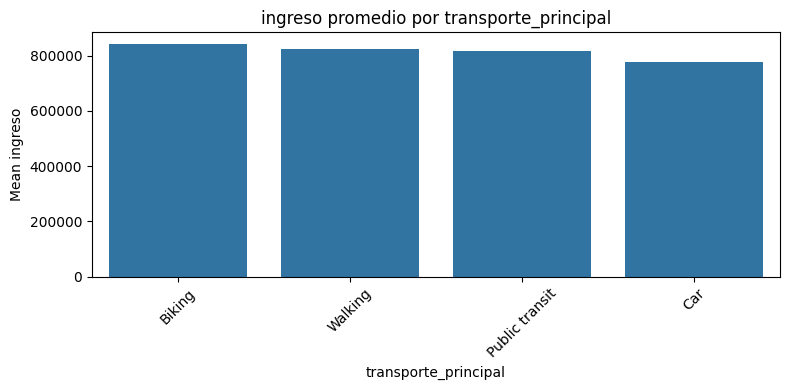


--- Registros por categoría (n y %) ---


,n,pct
transporte_principal,,
Public transit,4047,40.47
Car,2986,29.86
Biking,1940,19.40
Walking,1027,10.27



--- Dispersión del target por categoría ---


,std,p25,p75,iqr
transporte_principal,,,,
Biking,1.846060e+06,68485.5,372419.75,303934.25
Car,1.733471e+06,68448.0,331347.00,262899.00
Public transit,1.814618e+06,68514.0,345719.50,277205.50
Walking,1.800408e+06,68146.0,395269.50,327123.50


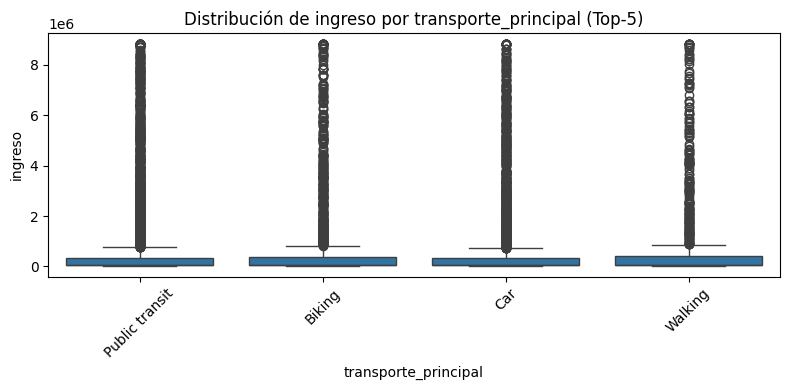

In [16]:
target_col = "ingreso"


for col in cat_cols:

    print(f"\n==============================")
    print(f"CATEGÓRICA: {col}")
    print(f"==============================")


    stats_cat = (
        data_1
        .groupby(col)[target_col]
        .agg(
            mean="mean",
            median="median"
        )
        .sort_values("mean", ascending=False)
    )

    print("\n--- Target medio / mediano por categoría ---")
    display(stats_cat)

    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=stats_cat.index.astype(str),
        y=stats_cat["mean"]
    )
    plt.title(f"{target_col} promedio por {col}")
    plt.xticks(rotation=45)
    plt.ylabel(f"Mean {target_col}")
    plt.tight_layout()
    plt.show()


    counts = data_1[col].value_counts(dropna=False)
    pct = (counts / len(data_1) * 100).round(2)

    freq_table = (
        counts
        .to_frame("n")
        .assign(pct=pct)
    )

    print("\n--- Registros por categoría (n y %) ---")
    display(freq_table)


    dispersion = (
        data_1
        .groupby(col)[target_col]
        .agg(
            std="std",
            p25=lambda x: x.quantile(0.25),
            p75=lambda x: x.quantile(0.75)
        )
    )

    dispersion["iqr"] = dispersion["p75"] - dispersion["p25"]

    print("\n--- Dispersión del target por categoría ---")
    display(dispersion)


    top_k = counts.head(5).index

    plt.figure(figsize=(8, 4))
    sns.boxplot(
        x=col,
        y=target_col,
        data=data_1.loc[data_1[col].isin(top_k)]
    )
    plt.title(f"Distribución de {target_col} por {col} (Top-5)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()